# Data analysis on thermal phase 2+1D CDT

Author: Seda den Boer

Date: 04/04/2024

In [102]:
# Load packages
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import seaborn as sns
import os
import glob
from scipy.stats import f_oneway, kruskal, shapiro

## Experiment parameters

In [107]:
chains = 16
k0_values = np.arange(0.0, 8.0, 1.0)
T = 3
thermal_sweeps = 1000
sweeps = 0
target_volume = 3000
ksteps = target_volume * 100

# k0 to make plots for
k0 = 0.0

colors = ['royalblue', 'orangered', 'seagreen']
T_values = [3, 5, 10]
N31_values = [3000, 6000, 9000]

## $k_3$

### Differences T = 3, 5, 10

### Critical $k_3$

In [6]:
last_k3 = {k: [] for k in k0_values}

for k in k0_values:
    path = f'thermal_{target_volume}/T{T}/measurements/k0={k}'
    filepaths = glob.glob(f'{path}/*k3_values.npy')
    for file in filepaths:
        
        # print(file)
        k3_values = np.load(file)

        # Get final value in the dataset
        last_k3[k].append(k3_values[-1])


# Make it a df 
df_critical_k3 = pd.DataFrame(last_k3).T
df_critical_k3.index.name = 'k0'
df_critical_k3.columns.name = 'chain'
df_critical_k3['mean'] = df_critical_k3.mean(axis=1)
df_critical_k3['std'] = df_critical_k3.std(axis=1)
df_critical_k3

chain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,mean,std
k0,,,,,,,,,,,,,,,,,,
0.0,0.95528,0.95120,0.95958,0.95686,0.95024,0.96274,0.94902,0.95210,0.95254,0.95678,0.96010,0.95858,0.95802,0.95544,0.95050,0.95298,0.955123,0.003930
1.0,1.08032,1.08552,1.08164,1.08254,1.09078,1.08212,1.09310,1.07826,1.07802,1.09012,1.08338,1.08864,1.08662,1.08212,1.08706,1.09084,1.085068,0.004557
2.0,1.22850,1.21734,1.22982,1.22288,1.22110,1.22816,1.22286,1.22308,1.22992,1.22966,1.22354,1.21786,1.23016,1.22364,1.23330,1.22962,1.225715,0.004621
3.0,1.37456,1.37010,1.36978,1.37092,1.37134,1.37594,1.36826,1.37360,1.37030,1.37580,1.36886,1.37260,1.36858,1.37054,1.37380,1.37884,1.372114,0.002958
4.0,1.53060,1.52818,1.52854,1.53332,1.52694,1.53262,1.53546,1.52408,1.52342,1.53068,1.52728,1.53030,1.53032,1.52298,1.53108,1.53418,1.529374,0.003631
5.0,1.70302,1.70318,1.70080,1.70560,1.70570,1.70602,1.70798,1.70298,1.70522,1.70256,1.70712,1.70384,1.69800,1.70520,1.69444,1.70742,1.703692,0.003452
6.0,1.89512,1.89964,1.89248,1.89846,1.89206,1.89702,1.89458,1.89242,1.89702,1.88910,1.89544,1.89330,1.89858,1.89676,1.89462,1.89238,1.894936,0.002787
7.0,2.14112,2.14036,2.13958,2.13870,2.13872,2.13996,2.13938,2.13938,2.13860,2.13952,2.13918,2.13976,2.13998,2.13998,2.13872,2.14142,2.139648,0.000800


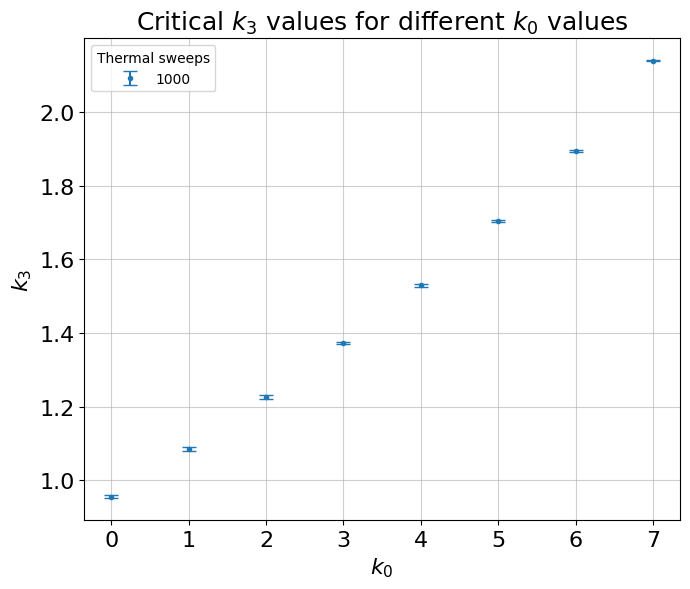

In [7]:
# Plot critical k3 with markers and interpolated line
plt.figure(figsize=(7, 6))
plt.errorbar(df_critical_k3.index, df_critical_k3['mean'], yerr=df_critical_k3['std'], fmt='.', capsize=5, xerr=None, label=1000)
plt.title('Critical $k_3$ values for different $k_0$ values', fontsize=18)
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('$k_3$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Thermal sweeps', fancybox=True)
plt.tight_layout()
savepath = f'plots/k3_tuning/T{T}/N{target_volume}/T{T}_critical_k3_values_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/k3_tuning/T{T}/N{target_volume}'):
    os.makedirs(f'plots/k3_tuning/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

chain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,mean,std
k0,,,,,,,,,,,,,,,,,,
0.0,0.95528,0.95120,0.95958,0.95686,0.95024,0.96274,0.94902,0.95210,0.95254,0.95678,0.96010,0.95858,0.95802,0.95544,0.95050,0.95298,0.955123,0.003930
1.0,1.08032,1.08552,1.08164,1.08254,1.09078,1.08212,1.09310,1.07826,1.07802,1.09012,1.08338,1.08864,1.08662,1.08212,1.08706,1.09084,1.085068,0.004557
2.0,1.22850,1.21734,1.22982,1.22288,1.22110,1.22816,1.22286,1.22308,1.22992,1.22966,1.22354,1.21786,1.23016,1.22364,1.23330,1.22962,1.225715,0.004621
3.0,1.37456,1.37010,1.36978,1.37092,1.37134,1.37594,1.36826,1.37360,1.37030,1.37580,1.36886,1.37260,1.36858,1.37054,1.37380,1.37884,1.372114,0.002958
4.0,1.53060,1.52818,1.52854,1.53332,1.52694,1.53262,1.53546,1.52408,1.52342,1.53068,1.52728,1.53030,1.53032,1.52298,1.53108,1.53418,1.529374,0.003631
5.0,1.70302,1.70318,1.70080,1.70560,1.70570,1.70602,1.70798,1.70298,1.70522,1.70256,1.70712,1.70384,1.69800,1.70520,1.69444,1.70742,1.703692,0.003452
6.0,1.89512,1.89964,1.89248,1.89846,1.89206,1.89702,1.89458,1.89242,1.89702,1.88910,1.89544,1.89330,1.89858,1.89676,1.89462,1.89238,1.894936,0.002787
7.0,2.14112,2.14036,2.13958,2.13870,2.13872,2.13996,2.13938,2.13938,2.13860,2.13952,2.13918,2.13976,2.13998,2.13998,2.13872,2.14142,2.139648,0.000800


/tmp/ipykernel_329/4062487256.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


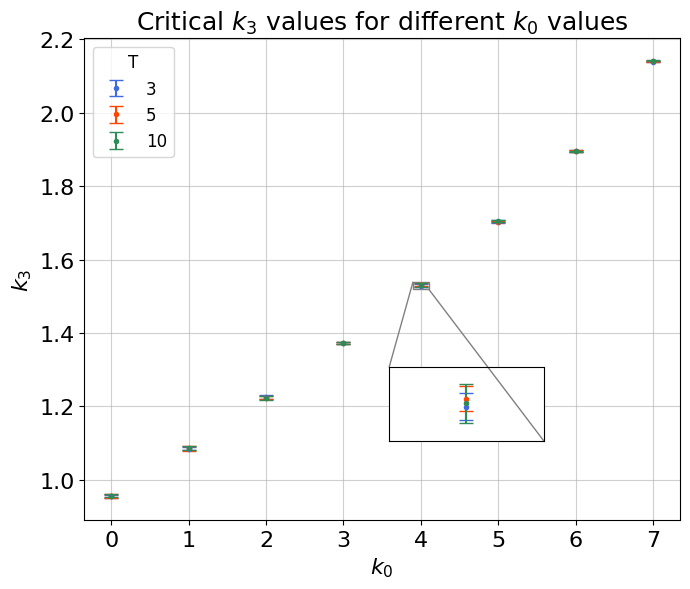

In [4]:
# Get data from T=3,5,10
T_values = [3, 5, 10]
last_k3_T3 = {k: [] for k in k0_values}
last_k3_T5 = {k: [] for k in k0_values}
last_k3_T10 = {k: [] for k in k0_values}

for T in T_values:
    for k in k0_values:
        path = f'thermal_3000/T{T}/measurements/k0={k}'
        filepaths = glob.glob(f'{path}/*k3_values.npy')
        for file in filepaths:
            
            # print(file)
            k3_values = np.load(file)

            # Get final value in the dataset
            if T == 3:
                last_k3_T3[k].append(k3_values[-1])
            elif T == 5:
                last_k3_T5[k].append(k3_values[-1])
            elif T == 10:
                last_k3_T10[k].append(k3_values[-1])

# Make it a df 
df_critical_k3_T3 = pd.DataFrame(last_k3_T3).T
df_critical_k3_T5 = pd.DataFrame(last_k3_T5).T
df_critical_k3_T10 = pd.DataFrame(last_k3_T10).T

for df in [df_critical_k3_T3, df_critical_k3_T5, df_critical_k3_T10]:
    df.index.name = 'k0'
    df.columns.name = 'chain'
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)

display(df_critical_k3_T3)

# Plot critical k3 with markers
fig, ax = plt.subplots(figsize=(7, 6))
ax.errorbar(df_critical_k3_T3.index, df_critical_k3_T3['mean'], yerr=df_critical_k3_T3['std'], fmt='.', capsize=5, xerr=None, label=3, color=colors[0])
ax.errorbar(df_critical_k3_T5.index, df_critical_k3_T5['mean'], yerr=df_critical_k3_T5['std'], fmt='.', capsize=5, xerr=None, label=5, color=colors[1])
ax.errorbar(df_critical_k3_T10.index, df_critical_k3_T10['mean'], yerr=df_critical_k3_T10['std'], fmt='.', capsize=5, xerr=None, label=10, color=colors[2])

axins = zoomed_inset_axes(ax, zoom=10, loc='lower left', bbox_to_anchor=(0.5, 0.15), bbox_transform=ax.transAxes)
axins.errorbar(df_critical_k3_T3.index, df_critical_k3_T3['mean'], yerr=df_critical_k3_T3['std'], fmt='.', capsize=5, xerr=None, label=3, color=colors[0])
axins.errorbar(df_critical_k3_T5.index, df_critical_k3_T5['mean'], yerr=df_critical_k3_T5['std'], fmt='.', capsize=5, xerr=None, label=5, color=colors[1])
axins.errorbar(df_critical_k3_T10.index, df_critical_k3_T10['mean'], yerr=df_critical_k3_T10['std'], fmt='.', capsize=5, xerr=None, label=10, color=colors[2])

# Sub region of the original image
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
x1, x2, y1, y2 = 3.9, 4.1, 1.52, 1.54
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])

ax.set_title('Critical $k_3$ values for different $k_0$ values', fontsize=18)
ax.set_xlabel('$k_0$', fontsize=16)
ax.set_ylabel('$k_3$', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, which="both", ls="-", alpha=0.6)
ax.legend(title='T', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/k3_tuning/compare_critical_k3_values_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/k3_tuning'):
    os.makedirs(f'plots/k3_tuning')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

### STATISTICS

In [37]:
# Loop through each row (each group)
for i, df in enumerate([df_critical_k3_T3, df_critical_k3_T5, df_critical_k3_T10]):
    print(f"\nShapiro-Wilk Test for T={T_values[i]}")
    for k0, data_row in df.iterrows():
        # Extract the observations for the current group
        observations = data_row[:-2]  # Exclude the last two columns (mean and std)
        
        # Perform Shapiro-Wilk test
        stat, p_value = shapiro(observations)
        
        # Print the result
        print(f"k0={k0}: Shapiro-Wilk Test Statistic={stat}, p-value={p_value}")

        if p_value < 0.05:
            print(f"Reject null hypothesis for k0={k0} (p-value={p_value})")
            # Perform Kruskal-Wallis test
            stat, p_value = kruskal(df_critical_k3_T3[k0], df_critical_k3_T5[k0], df_critical_k3_T10[k0])
            print(f"Kruskal-Wallis Test Statistic={stat}, p-value={p_value}")
        else:
            print(f"Fail to reject null hypothesis for k0={k0} (p-value={p_value})")
            # Perform ANOVA test
            stat, p_value = f_oneway(df_critical_k3_T3[k0], df_critical_k3_T5[k0], df_critical_k3_T10[k0])
            print(f"ANOVA Test Statistic={stat}, p-value={p_value}")
print()

# Save the results to a txt file
with open(f'plots/k3_tuning/compare_critical_k3_values_N{target_volume}_tswps={thermal_sweeps}.txt', 'w') as f:
    for i, df in enumerate([df_critical_k3_T3, df_critical_k3_T5, df_critical_k3_T10]):
        f.write(f"{'='*40}\n")
        f.write(f"{'Shapiro-Wilk Test for T='}{T_values[i]}\n")
        f.write(f"{'='*40}\n")
        for k0, data_row in df.iterrows():
            observations = data_row[:-2]
            stat, p_value = shapiro(observations)
            f.write(f"k0={k0}: Shapiro-Wilk Test Statistic={stat}, p-value={p_value}\n")
            if p_value < 0.05:
                f.write(f"Reject null hypothesis for k0={k0} (p-value={p_value})\n")
                stat, p_value = kruskal(df_critical_k3_T3[k0], df_critical_k3_T5[k0], df_critical_k3_T10[k0])
                f.write(f"Kruskal-Wallis Test Statistic={stat}, p-value={p_value}\n")
            else:
                f.write(f"Fail to reject null hypothesis for k0={k0} (p-value={p_value})\n")
                stat, p_value = f_oneway(df_critical_k3_T3[k0], df_critical_k3_T5[k0], df_critical_k3_T10[k0])
                f.write(f"ANOVA Test Statistic={stat}, p-value={p_value}\n")
            f.write('\n')
print("Results saved to file")



Shapiro-Wilk Test for T=3
k0=0.0: Shapiro-Wilk Test Statistic=0.9621440811388772, p-value=0.7008278062101361
Fail to reject null hypothesis for k0=0.0 (p-value=0.7008278062101361)
ANOVA Test Statistic=0.00010177751582570364, p-value=0.9998982281565475
k0=1.0: Shapiro-Wilk Test Statistic=0.9502893641294137, p-value=0.49428502996868484
Fail to reject null hypothesis for k0=1.0 (p-value=0.49428502996868484)
ANOVA Test Statistic=4.51913290403579e-05, p-value=0.9999548097893187
k0=2.0: Shapiro-Wilk Test Statistic=0.9182189010621727, p-value=0.1579015948062918
Fail to reject null hypothesis for k0=2.0 (p-value=0.1579015948062918)
ANOVA Test Statistic=8.480355600846168e-05, p-value=0.9999152003821397
k0=3.0: Shapiro-Wilk Test Statistic=0.9357953961171442, p-value=0.30065702838138963
Fail to reject null hypothesis for k0=3.0 (p-value=0.30065702838138963)
ANOVA Test Statistic=0.000107025200231002, p-value=0.9998929810721463
k0=4.0: Shapiro-Wilk Test Statistic=0.9566155811867971, p-value=0.6010

### Differences Ñ31 = 3000, 6000, 90000

<>:57: SyntaxWarning: invalid escape sequence '\w'
<>:57: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_329/4191561824.py:57: SyntaxWarning: invalid escape sequence '\w'
  ax.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)
/tmp/ipykernel_329/4191561824.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


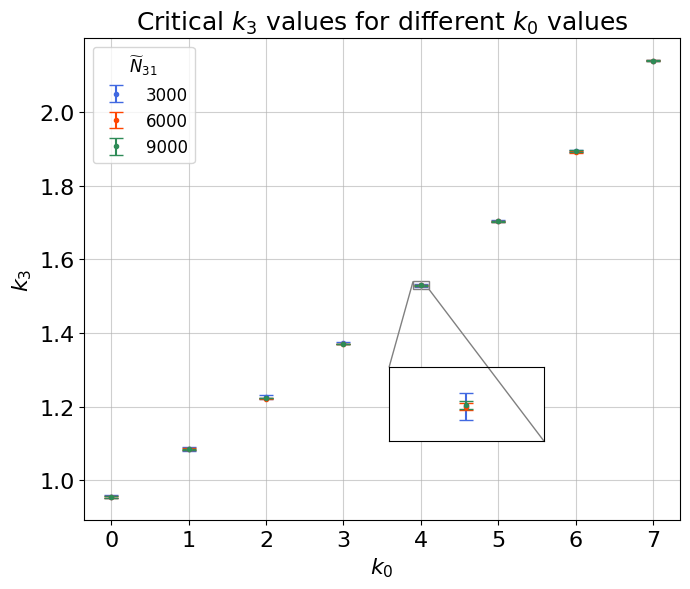

In [17]:
# Get data from N31=3000, 6000, 9000
last_k3_N31_3000 = {k: [] for k in k0_values}
last_k3_N31_6000 = {k: [] for k in k0_values}
last_k3_N31_9000 = {k: [] for k in k0_values}

for N31 in N31_values:
    for k in k0_values:
        path = f'thermal_{N31}/T3/measurements/k0={k}'
        filepaths = glob.glob(f'{path}/*k3_values.npy')

        for file in filepaths:
            k3_values = np.load(file)

            # Get final value in the dataset
            if N31 == 3000:
                last_k3_N31_3000[k].append(k3_values[-1])
            elif N31 == 6000:
                last_k3_N31_6000[k].append(k3_values[-1])
            elif N31 == 9000:
                last_k3_N31_9000[k].append(k3_values[-1])

# Make it a df
df_critical_k3_N31_3000 = pd.DataFrame(last_k3_N31_3000).T
df_critical_k3_N31_6000 = pd.DataFrame(last_k3_N31_6000).T
df_critical_k3_N31_9000 = pd.DataFrame(last_k3_N31_9000).T

for df in [df_critical_k3_N31_3000, df_critical_k3_N31_6000, df_critical_k3_N31_9000]:
    df.index.name = 'k0'
    df.columns.name = 'chain'
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)

# Plot critical k3 with markers
fig, ax = plt.subplots(figsize=(7, 6))
ax.errorbar(df_critical_k3_N31_3000.index, df_critical_k3_N31_3000['mean'], yerr=df_critical_k3_N31_3000['std'], fmt='.', capsize=5, xerr=None, label=3000, color=colors[0])
ax.errorbar(df_critical_k3_N31_6000.index, df_critical_k3_N31_6000['mean'], yerr=df_critical_k3_N31_6000['std'], fmt='.', capsize=5, xerr=None, label=6000, color=colors[1])
ax.errorbar(df_critical_k3_N31_9000.index, df_critical_k3_N31_9000['mean'], yerr=df_critical_k3_N31_9000['std'], fmt='.', capsize=5, xerr=None, label=9000, color=colors[2])

# Sub region of the original image
axins = zoomed_inset_axes(ax, zoom=10, loc='lower left', bbox_to_anchor=(0.5, 0.15), bbox_transform=ax.transAxes)
axins.errorbar(df_critical_k3_N31_3000.index, df_critical_k3_N31_3000['mean'], yerr=df_critical_k3_N31_3000['std'], fmt='.', capsize=5, xerr=None, label=3000, color=colors[0])
axins.errorbar(df_critical_k3_N31_6000.index, df_critical_k3_N31_6000['mean'], yerr=df_critical_k3_N31_6000['std'], fmt='.', capsize=5, xerr=None, label=6000, color=colors[1])
axins.errorbar(df_critical_k3_N31_9000.index, df_critical_k3_N31_9000['mean'], yerr=df_critical_k3_N31_9000['std'], fmt='.', capsize=5, xerr=None, label=9000, color=colors[2])

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
x1, x2, y1, y2 = 3.9, 4.1, 1.52, 1.54
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])

ax.set_title('Critical $k_3$ values for different $k_0$ values', fontsize=18)
ax.set_xlabel('$k_0$', fontsize=16)
ax.set_ylabel('$k_3$', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, which="both", ls="-", alpha=0.6)
ax.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/k3_tuning/compare_critical_k3_values_T3_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/k3_tuning'):
    os.makedirs(f'plots/k3_tuning')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

### STATISTICS

In [38]:
# Loop through each row (each group)
for i, df in enumerate([df_critical_k3_N31_3000, df_critical_k3_N31_6000, df_critical_k3_N31_9000]):
    print(f"\nShapiro-Wilk Test for N31={N31_values[i]}")
    for k0, data_row in df.iterrows():
        # Extract the observations for the current group
        observations = data_row[:-2]  # Exclude the last two columns (mean and std)
        
        # Perform Shapiro-Wilk test
        stat, p_value = shapiro(observations)
        
        # Print the result
        print(f"k0={k0}: Shapiro-Wilk Test Statistic={stat}, p-value={p_value}")

        if p_value < 0.05:
            print(f"Reject null hypothesis for k0={k0} (p-value={p_value})")
            # Perform Kruskal-Wallis test
            stat, p_value = kruskal(df_critical_k3_N31_3000[k0], df_critical_k3_N31_6000[k0], df_critical_k3_N31_9000[k0])
            print(f"Kruskal-Wallis Test Statistic={stat}, p-value={p_value}")
        else:
            print(f"Fail to reject null hypothesis for k0={k0} (p-value={p_value})")
            # Perform ANOVA test
            stat, p_value = f_oneway(df_critical_k3_N31_3000[k0], df_critical_k3_N31_6000[k0], df_critical_k3_N31_9000[k0])
            print(f"ANOVA Test Statistic={stat}, p-value={p_value}")

# Save the results to a txt file
with open(f'plots/k3_tuning/compare_critical_k3_values_T3_tswps={thermal_sweeps}.txt', 'w') as f:
    for i, df in enumerate([df_critical_k3_N31_3000, df_critical_k3_N31_6000, df_critical_k3_N31_9000]):
        f.write(f"{'='*40}\n")
        f.write(f"{'Shapiro-Wilk Test for N31='}{N31_values[i]}\n")
        f.write(f"{'='*40}\n")
        for k0, data_row in df.iterrows():
            observations = data_row[:-2]
            stat, p_value = shapiro(observations)
            f.write(f"k0={k0}: Shapiro-Wilk Test Statistic={stat}, p-value={p_value}\n")
            if p_value < 0.05:
                f.write(f"Reject null hypothesis for k0={k0} (p-value={p_value})\n")
                stat, p_value = kruskal(df_critical_k3_N31_3000[k0], df_critical_k3_N31_6000[k0], df_critical_k3_N31_9000[k0])
                f.write(f"Kruskal-Wallis Test Statistic={stat}, p-value={p_value}\n")
            else:
                f.write(f"Fail to reject null hypothesis for k0={k0} (p-value={p_value})\n")
                stat, p_value = f_oneway(df_critical_k3_N31_3000[k0], df_critical_k3_N31_6000[k0], df_critical_k3_N31_9000[k0])
                f.write(f"ANOVA Test Statistic={stat}, p-value={p_value}\n")
            f.write('\n')
print("Results saved to file")


Shapiro-Wilk Test for N31=3000
k0=0.0: Shapiro-Wilk Test Statistic=0.9621440811388772, p-value=0.7008278062101361
Fail to reject null hypothesis for k0=0.0 (p-value=0.7008278062101361)
ANOVA Test Statistic=4.09533769480065e-05, p-value=0.9999590475414925
k0=1.0: Shapiro-Wilk Test Statistic=0.9502893641294137, p-value=0.49428502996868484
Fail to reject null hypothesis for k0=1.0 (p-value=0.49428502996868484)
ANOVA Test Statistic=9.324837796165038e-06, p-value=0.9999906752098203
k0=2.0: Shapiro-Wilk Test Statistic=0.9182189010621727, p-value=0.1579015948062918
Fail to reject null hypothesis for k0=2.0 (p-value=0.1579015948062918)
ANOVA Test Statistic=2.486384939205742e-05, p-value=0.9999751364891487
k0=3.0: Shapiro-Wilk Test Statistic=0.9357953961171442, p-value=0.30065702838138963
Fail to reject null hypothesis for k0=3.0 (p-value=0.30065702838138963)
ANOVA Test Statistic=4.7700072008326535e-05, p-value=0.999952301173964
k0=4.0: Shapiro-Wilk Test Statistic=0.9566155811867971, p-value=0

### $k_3$ over time

In [11]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_k3 = glob.glob(f'{path}/*k3_values.npy')
k3_values = []
for filepath in filepaths_k3:
    k3_values.append(np.load(filepath))

# Make it a df to plot easily the mean and std
df_k3 = pd.DataFrame(k3_values)
# make a column for chain, sweep and the values k3
df_k3 = df_k3.melt(var_name='sweep', value_name='k3', ignore_index=False).reset_index()
# Increase sweep number by 1
df_k3['sweep'] += 1
df_k3

,index,sweep,k3
0,0,1,0.80000
1,1,1,0.80000
2,2,1,0.80000
3,3,1,0.80000
4,4,1,0.80000
...,...,...,...
15995,11,1000,0.96266
15996,12,1000,0.95904
15997,13,1000,0.95100
15998,14,1000,0.96036


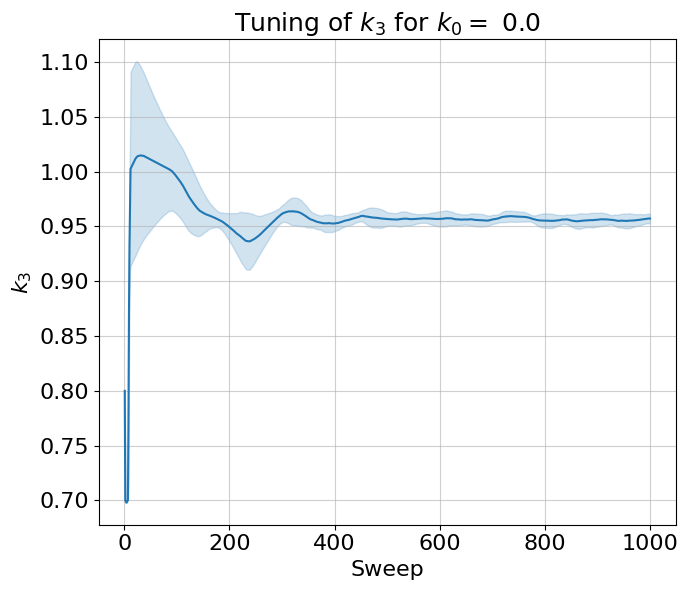

In [12]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_k3, x='sweep', y='k3', errorbar='sd')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('$k_3$', fontsize=16)
plt.title(f'Tuning of $k_3$ for $k_0=$ {k0}', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/k3_tuning/T{T}/N{target_volume}/T{T}_k3_tuning_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/k3_tuning/T{T}/N{target_volume}'):
    os.makedirs(f'plots/k3_tuning/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

## Acceptance ratios

In [13]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_ar = glob.glob(f'{path}/*acceptance_ratios.npy')
ar_add = []
ar_delete = []
ar_flip = []
ar_shift = []
ar_ishift = []

for filepath in filepaths_ar:
    ar = np.load(filepath)
    ar_add.append(ar[:, 0])
    ar_delete.append(ar[:, 1])
    ar_flip.append(ar[:, 2])
    ar_shift.append(ar[:, 3])
    ar_ishift.append(ar[:, 4])

# Make it a df to plot easily the mean and std
df_ar_add = pd.DataFrame(ar_add)
df_ar_delete = pd.DataFrame(ar_delete)
df_ar_flip = pd.DataFrame(ar_flip)
df_ar_shift = pd.DataFrame(ar_shift)
df_ar_ishift = pd.DataFrame(ar_ishift)

# Make a column for chain, sweep and the values ar
df_ar_add = df_ar_add.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_delete = df_ar_delete.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_flip = df_ar_flip.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_shift = df_ar_shift.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_ishift = df_ar_ishift.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()

# Increase sweep number by 1
df_ar_add['sweep'] += 1
df_ar_delete['sweep'] += 1
df_ar_flip['sweep'] += 1
df_ar_shift['sweep'] += 1
df_ar_ishift['sweep'] += 1

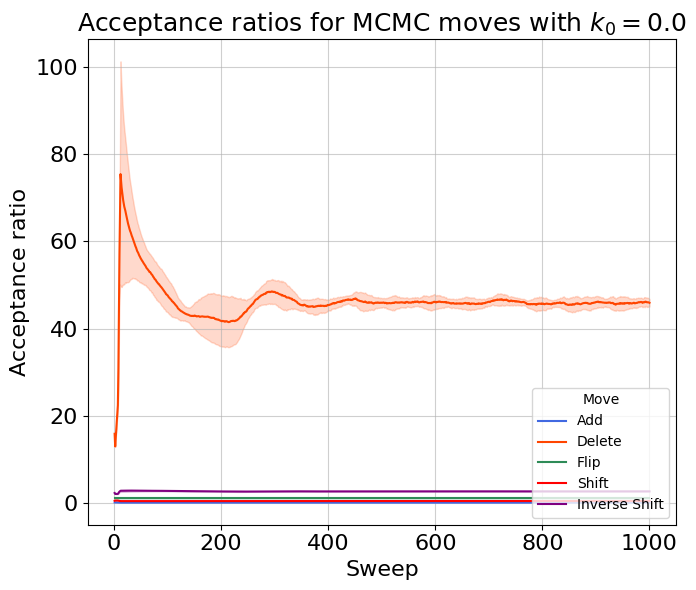

In [14]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_ar_add, x='sweep', y='ar', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_ar_delete, x='sweep', y='ar', errorbar='sd', label='Delete', color='orangered')
sns.lineplot(data=df_ar_flip, x='sweep', y='ar', errorbar='sd', label='Flip', color='seagreen')
sns.lineplot(data=df_ar_shift, x='sweep', y='ar', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_ar_ishift, x='sweep', y='ar', errorbar='sd', label='Inverse Shift', color='purple')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Acceptance ratio', fontsize=16)
plt.title(f'Acceptance ratios for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='lower right')
plt.tight_layout()
savepath = f'plots/acceptance_ratios/T{T}/N{target_volume}/T{T}_acceptance_ratios_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/acceptance_ratios/T{T}/N{target_volume}'):
    os.makedirs(f'plots/acceptance_ratios/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


### Zoom-in

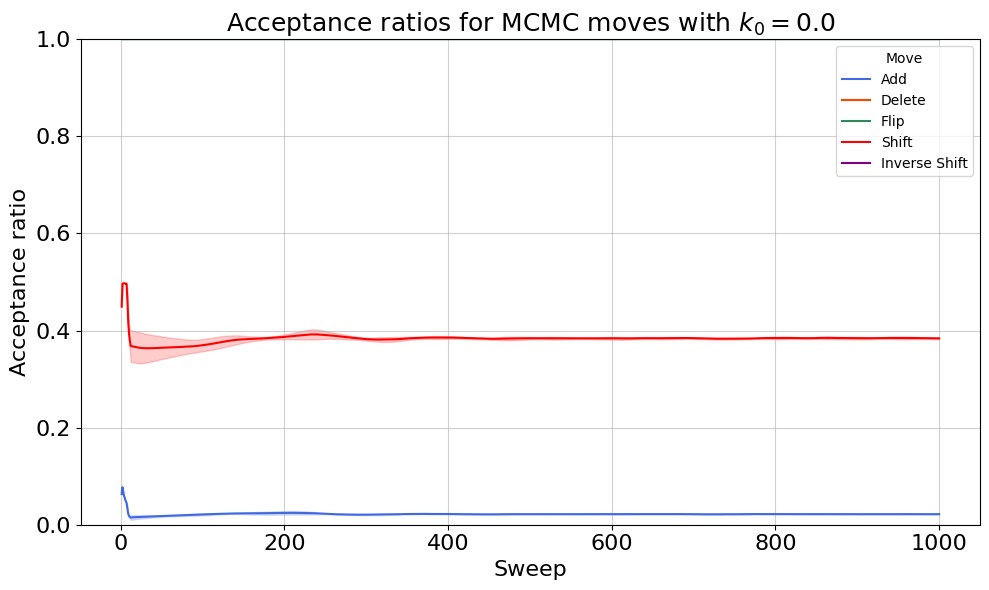

In [15]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ar_add, x='sweep', y='ar', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_ar_delete, x='sweep', y='ar', errorbar='sd', label='Delete', color='orangered')
sns.lineplot(data=df_ar_flip, x='sweep', y='ar', errorbar='sd', label='Flip', color='seagreen')
sns.lineplot(data=df_ar_shift, x='sweep', y='ar', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_ar_ishift, x='sweep', y='ar', errorbar='sd', label='Inverse Shift', color='purple')
plt.ylim(0, 1)
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Acceptance ratio', fontsize=16)
plt.title(f'Acceptance ratios for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='upper right')
plt.tight_layout()
savepath = f'plots/acceptance_ratios/T{T}/N{target_volume}/zoomin_T{T}_acceptance_ratios_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/acceptance_ratios/T{T}/N{target_volume}'):
    os.makedirs(f'plots/acceptance_ratios/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


## Succes rates

In [16]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_successes = glob.glob(f'{path}/*successes.npy')
filepath_fails = glob.glob(f'{path}/*fails.npy')

sr_add = []
sr_delete = []
sr_flip = []
sr_shift = []
sr_ishift = []

for i in range(chains):
    successes = np.load(filepaths_successes[i])
    fails = np.load(filepath_fails[i])
    sr_add.append(successes[:, 0] / (successes[:, 0] + fails[:, 0]))
    sr_delete.append(successes[:, 1] / (successes[:, 1] + fails[:, 1]))
    sr_flip.append(successes[:, 2] / (successes[:, 2] + fails[:, 2]))
    sr_shift.append(successes[:, 3] / (successes[:, 3] + fails[:, 3]))
    sr_ishift.append(successes[:, 4] / (successes[:, 4] + fails[:, 4]))

# Make it a df to plot easily the mean and std
df_sr_add = pd.DataFrame(sr_add)
df_sr_delete = pd.DataFrame(sr_delete)
df_sr_flip = pd.DataFrame(sr_flip)
df_sr_shift = pd.DataFrame(sr_shift)
df_sr_ishift = pd.DataFrame(sr_ishift)

# Make a column for chain, sweep and the values sr
df_sr_add = df_sr_add.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_delete = df_sr_delete.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_flip = df_sr_flip.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_shift = df_sr_shift.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_ishift = df_sr_ishift.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()

# Increase sweep number by 1
df_sr_add['sweep'] += 1
df_sr_delete['sweep'] += 1
df_sr_flip['sweep'] += 1
df_sr_shift['sweep'] += 1
df_sr_ishift['sweep'] += 1

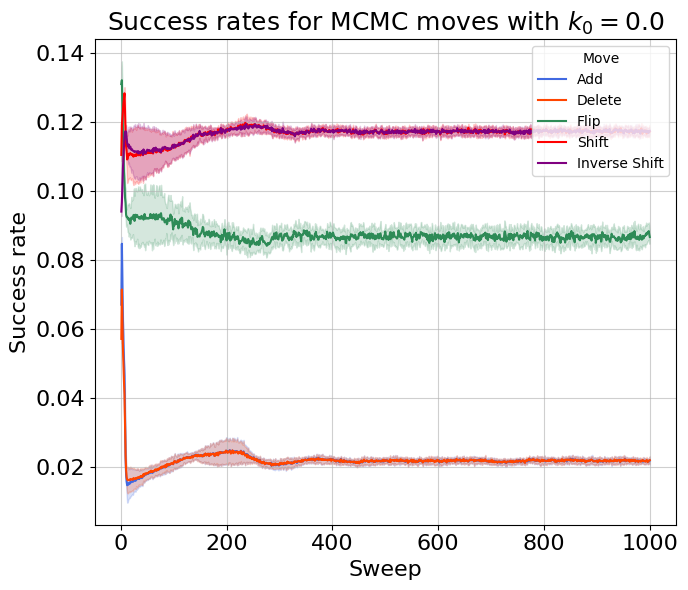

In [17]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd', label='Delete', color='orangered')
sns.lineplot(data=df_sr_flip, x='sweep', y='sr', errorbar='sd', label='Flip', color='seagreen')
sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd', label='Inverse Shift', color='purple')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate', fontsize=16)
plt.title(f'Success rates for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='upper right')
plt.tight_layout()
savepath = f'plots/success_rates/T{T}/N{target_volume}/T{T}_success_rates_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/success_rates/T{T}/N{target_volume}'):
    os.makedirs(f'plots/success_rates/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


### Zoom-in

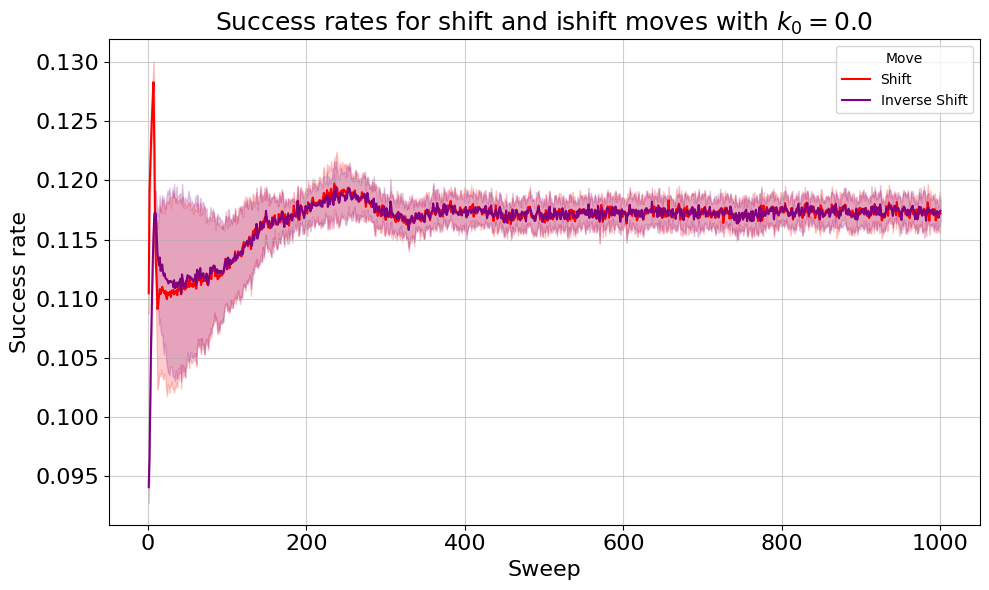

In [18]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd', label='Inverse Shift', color='purple')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate', fontsize=16)
plt.title(f'Success rates for shift and ishift moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True)
plt.tight_layout()
savepath = f'plots/success_rates/T{T}/N{target_volume}/T{T}_shift_ishift_success_rates_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/success_rates/T{T}/N{target_volume}'):
    os.makedirs(f'plots/success_rates/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


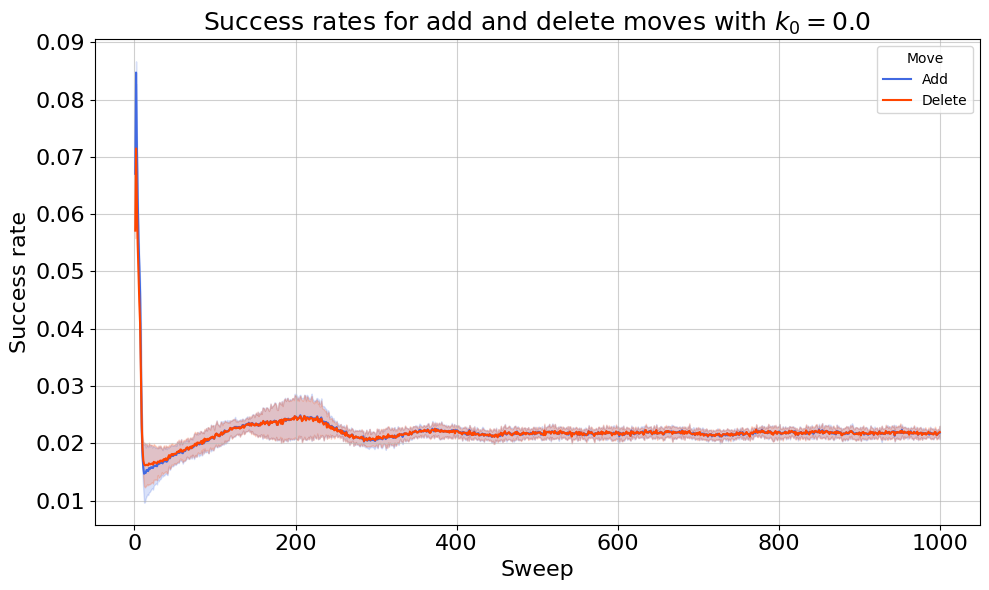

In [19]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd', label='Delete', color='orangered')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate', fontsize=16)
plt.title(f'Success rates for add and delete moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True)
plt.tight_layout()
savepath = f'plots/success_rates/T{T}/N{target_volume}/T{T}_add_delete_success_rates_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/success_rates/T{T}/N{target_volume}'):
    os.makedirs(f'plots/success_rates/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


## $<N_{22}/N_{31}>$

### Mean at 1000th thermal sweep

/tmp/ipykernel_329/175938027.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


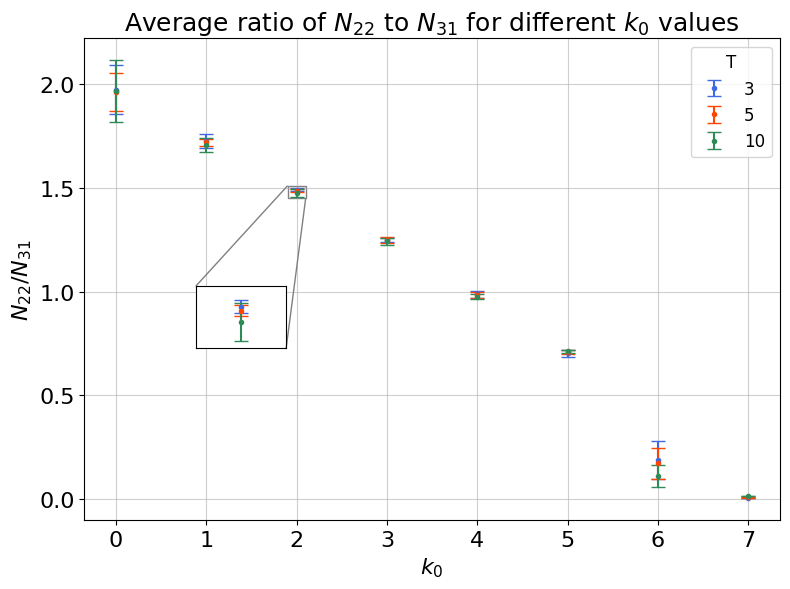

In [29]:
avg_N22_N31_T3 = {k: [] for k in k0_values}
avg_N22_N31_T5 = {k: [] for k in k0_values}
avg_N22_N31_T10 = {k: [] for k in k0_values}

for T in T_values:
    for k in k0_values:
        path = f'thermal_3000/T{T}/measurements/k0={k}'
        filepaths_n22 = glob.glob(f'{path}/*n_tetras_22.npy')
        filepaths_n31 = glob.glob(f'{path}/*n_tetras_31.npy')
        for file_n22, file_n31 in zip(filepaths_n22, filepaths_n31):
            n22 = np.load(file_n22)
            n31 = np.load(file_n31)
            avg_N22_N31 = np.mean(n22 / n31)
            std_N22_N31 = np.std(n22 / n31)

            if T == 3:
                avg_N22_N31_T3[k].append(avg_N22_N31)
            elif T == 5:
                avg_N22_N31_T5[k].append(avg_N22_N31)
            elif T == 10:
                avg_N22_N31_T10[k].append(avg_N22_N31)

# Make it a df
df_avg_N22_N31_T3 = pd.DataFrame(avg_N22_N31_T3).T
df_avg_N22_N31_T5 = pd.DataFrame(avg_N22_N31_T5).T
df_avg_N22_N31_T10 = pd.DataFrame(avg_N22_N31_T10).T

for df in [df_avg_N22_N31_T3, df_avg_N22_N31_T5, df_avg_N22_N31_T10]:
    df.index.name = 'k0'
    df.columns.name = 'chain'
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)

# Plot the chains average with the standard deviation
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(df_avg_N22_N31_T3.index, df_avg_N22_N31_T3['mean'], yerr=df_avg_N22_N31_T3['std'], fmt='.', capsize=5, xerr=None, label=3, color=colors[0])
ax.errorbar(df_avg_N22_N31_T5.index, df_avg_N22_N31_T5['mean'], yerr=df_avg_N22_N31_T5['std'], fmt='.', capsize=5, xerr=None, label=5, color=colors[1])
ax.errorbar(df_avg_N22_N31_T10.index, df_avg_N22_N31_T10['mean'], yerr=df_avg_N22_N31_T10['std'], fmt='.', capsize=5, xerr=None, label=10, color=colors[2])

axins = zoomed_inset_axes(ax, zoom=5, loc='upper right', bbox_to_anchor=(0.3, 0.5), bbox_transform=ax.transAxes)
axins.errorbar(df_avg_N22_N31_T3.index, df_avg_N22_N31_T3['mean'], yerr=df_avg_N22_N31_T3['std'], fmt='.', capsize=5, xerr=None, label=3, color=colors[0])
axins.errorbar(df_avg_N22_N31_T5.index, df_avg_N22_N31_T5['mean'], yerr=df_avg_N22_N31_T5['std'], fmt='.', capsize=5, xerr=None, label=5, color=colors[1])
axins.errorbar(df_avg_N22_N31_T10.index, df_avg_N22_N31_T10['mean'], yerr=df_avg_N22_N31_T10['std'], fmt='.', capsize=5, xerr=None, label=10, color=colors[2])

# Sub region of the original image
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
x1, x2, y1, y2 = 1.9, 2.1, 1.45, 1.51
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])

ax.set_title('Average ratio of $N_{22}$ to $N_{31}$ for different $k_0$ values', fontsize=18)
ax.set_xlabel('$k_0$', fontsize=16)
ax.set_ylabel('$N_{22} / N_{31}$', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, which="both", ls="-", alpha=0.6)
ax.legend(title='T', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.savefig(f'plots/n22_n31/n22_n31_N3000_tswps={thermal_sweeps}.png', dpi=400, bbox_inches='tight')

#### STATISTICS

In [39]:
# Loop through each row (each group)
for i, df in enumerate([df_avg_N22_N31_T3, df_avg_N22_N31_T5, df_avg_N22_N31_T10]):
    print(f"\nShapiro-Wilk Test for T={T_values[i]}")
    for k0, data_row in df.iterrows():
        # Extract the observations for the current group
        observations = data_row[:-2]  # Exclude the last two columns (mean and std)
        
        # Perform Shapiro-Wilk test
        stat, p_value = shapiro(observations)
        
        # Print the result
        print(f"k0={k0}: Shapiro-Wilk Test Statistic={stat}, p-value={p_value}")

        if p_value < 0.05:
            print(f"Reject null hypothesis for k0={k0} (p-value={p_value})")
            # Perform Kruskal-Wallis test
            stat, p_value = kruskal(df_avg_N22_N31_T3[k0], df_avg_N22_N31_T5[k0], df_avg_N22_N31_T10[k0])
            print(f"Kruskal-Wallis Test Statistic={stat}, p-value={p_value}")
        else:
            print(f"Fail to reject null hypothesis for k0={k0} (p-value={p_value})")
            # Perform ANOVA test
            stat, p_value = f_oneway(df_avg_N22_N31_T3[k0], df_avg_N22_N31_T5[k0], df_avg_N22_N31_T10[k0])
            print(f"ANOVA Test Statistic={stat}, p-value={p_value}")
print()

# Save the results to a txt file
with open(f'plots/n22_n31/n22_n31_N3000_tswps={thermal_sweeps}.txt', 'w') as f:
    for i, df in enumerate([df_avg_N22_N31_T3, df_avg_N22_N31_T5, df_avg_N22_N31_T10]):
        f.write(f"{'='*40}\n")
        f.write(f"{'Shapiro-Wilk Test for T='}{T_values[i]}\n")
        f.write(f"{'='*40}\n")
        for k0, data_row in df.iterrows():
            observations = data_row[:-2]
            stat, p_value = shapiro(observations)
            f.write(f"k0={k0}: Shapiro-Wilk Test Statistic={stat}, p-value={p_value}\n")
            if p_value < 0.05:
                f.write(f"Reject null hypothesis for k0={k0} (p-value={p_value})\n")
                stat, p_value = kruskal(df_avg_N22_N31_T3[k0], df_avg_N22_N31_T5[k0], df_avg_N22_N31_T10[k0])
                f.write(f"Kruskal-Wallis Test Statistic={stat}, p-value={p_value}\n")
            else:
                f.write(f"Fail to reject null hypothesis for k0={k0} (p-value={p_value})\n")
                stat, p_value = f_oneway(df_avg_N22_N31_T3[k0], df_avg_N22_N31_T5[k0], df_avg_N22_N31_T10[k0])
                f.write(f"ANOVA Test Statistic={stat}, p-value={p_value}\n")
            f.write('\n')
print("Results saved to file")


Shapiro-Wilk Test for T=3
k0=0.0: Shapiro-Wilk Test Statistic=0.8821063113665376, p-value=0.04185504699422959
Reject null hypothesis for k0=0.0 (p-value=0.04185504699422959)
Kruskal-Wallis Test Statistic=0.0799999999999983, p-value=0.9607894391523241
k0=1.0: Shapiro-Wilk Test Statistic=0.6262701424314301, p-value=2.8956976313431303e-05
Reject null hypothesis for k0=1.0 (p-value=2.8956976313431303e-05)
Kruskal-Wallis Test Statistic=0.060000000000002274, p-value=0.970445533548507
k0=2.0: Shapiro-Wilk Test Statistic=0.9636447544734611, p-value=0.7281153920986497
Fail to reject null hypothesis for k0=2.0 (p-value=0.7281153920986497)
ANOVA Test Statistic=0.0011581708701401475, p-value=0.9988425633465473
k0=3.0: Shapiro-Wilk Test Statistic=0.9521405612197389, p-value=0.524341223297462
Fail to reject null hypothesis for k0=3.0 (p-value=0.524341223297462)
ANOVA Test Statistic=0.016262598204236464, p-value=0.9838813019718744
k0=4.0: Shapiro-Wilk Test Statistic=0.7133051072364858, p-value=0.000

### Ñ31 = 3000, 6000, 9000

<>:57: SyntaxWarning: invalid escape sequence '\w'
<>:57: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_329/2935294346.py:57: SyntaxWarning: invalid escape sequence '\w'
  ax.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)
/tmp/ipykernel_329/2935294346.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


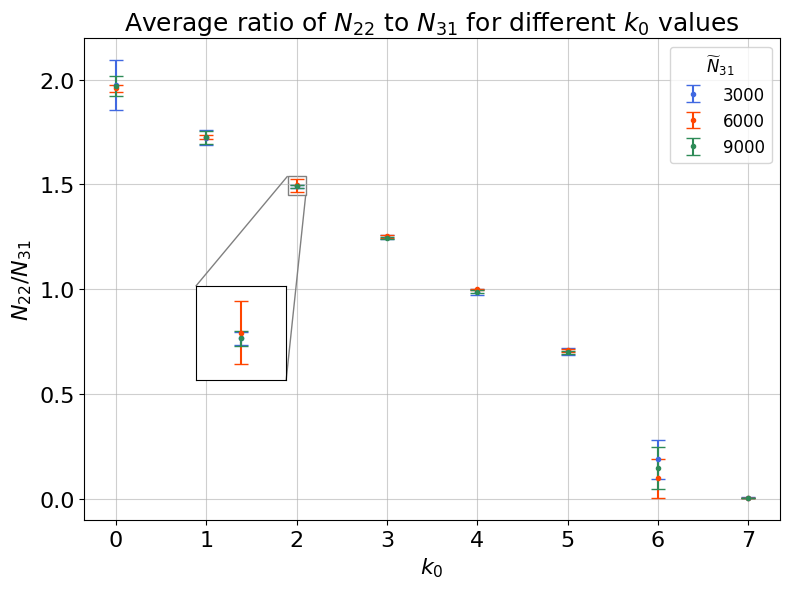

In [41]:
avg_N22_N31_N31_3000 = {k: [] for k in k0_values}
avg_N22_N31_N31_6000 = {k: [] for k in k0_values}
avg_N22_N31_N31_9000 = {k: [] for k in k0_values}

for N31 in N31_values:
    for k in k0_values:
        path = f'thermal_{N31}/T3/measurements/k0={k}'
        filepaths_n22 = glob.glob(f'{path}/*n_tetras_22.npy')
        filepaths_n31 = glob.glob(f'{path}/*n_tetras_31.npy')
        for file_n22, file_n31 in zip(filepaths_n22, filepaths_n31):
            n22 = np.load(file_n22)
            n31 = np.load(file_n31)
            avg_N22_N31 = np.mean(n22 / n31)
            std_N22_N31 = np.std(n22 / n31)

            if N31 == 3000:
                avg_N22_N31_N31_3000[k].append(avg_N22_N31)
            elif N31 == 6000:
                avg_N22_N31_N31_6000[k].append(avg_N22_N31)
            elif N31 == 9000:
                avg_N22_N31_N31_9000[k].append(avg_N22_N31)

# Make it a df
df_avg_N22_N31_N31_3000 = pd.DataFrame(avg_N22_N31_N31_3000).T
df_avg_N22_N31_N31_6000 = pd.DataFrame(avg_N22_N31_N31_6000).T
df_avg_N22_N31_N31_9000 = pd.DataFrame(avg_N22_N31_N31_9000).T

for df in [df_avg_N22_N31_N31_3000, df_avg_N22_N31_N31_6000, df_avg_N22_N31_N31_9000]:
    df.index.name = 'k0'
    df.columns.name = 'chain'
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)

# Plot the chains average with the standard deviation
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(df_avg_N22_N31_N31_3000.index, df_avg_N22_N31_N31_3000['mean'], yerr=df_avg_N22_N31_N31_3000['std'], fmt='.', capsize=5, xerr=None, label=3000, color=colors[0])
ax.errorbar(df_avg_N22_N31_N31_6000.index, df_avg_N22_N31_N31_6000['mean'], yerr=df_avg_N22_N31_N31_6000['std'], fmt='.', capsize=5, xerr=None, label=6000, color=colors[1])
ax.errorbar(df_avg_N22_N31_N31_9000.index, df_avg_N22_N31_N31_9000['mean'], yerr=df_avg_N22_N31_N31_9000['std'], fmt='.', capsize=5, xerr=None, label=9000, color=colors[2])

axins = zoomed_inset_axes(ax, zoom=5, loc='upper right', bbox_to_anchor=(0.3, 0.5), bbox_transform=ax.transAxes)
axins.errorbar(df_avg_N22_N31_N31_3000.index, df_avg_N22_N31_N31_3000['mean'], yerr=df_avg_N22_N31_N31_3000['std'], fmt='.', capsize=5, xerr=None, label=3000, color=colors[0])
axins.errorbar(df_avg_N22_N31_N31_6000.index, df_avg_N22_N31_N31_6000['mean'], yerr=df_avg_N22_N31_N31_6000['std'], fmt='.', capsize=5, xerr=None, label=6000, color=colors[1])
axins.errorbar(df_avg_N22_N31_N31_9000.index, df_avg_N22_N31_N31_9000['mean'], yerr=df_avg_N22_N31_N31_9000['std'], fmt='.', capsize=5, xerr=None, label=9000, color=colors[2])

# Sub region of the original image
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
x1, x2, y1, y2 = 1.9, 2.1, 1.45, 1.54
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])
ax.set_title('Average ratio of $N_{22}$ to $N_{31}$ for different $k_0$ values', fontsize=18)
ax.set_xlabel('$k_0$', fontsize=16)
ax.set_ylabel('$N_{22} / N_{31}$', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, which="both", ls="-", alpha=0.6)
ax.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.savefig(f'plots/n22_n31/n22_n31_T3_tswps={thermal_sweeps}.png', dpi=400, bbox_inches='tight')

#### STATISTICS

In [42]:
# Loop through each row (each group)
for i, df in enumerate([df_avg_N22_N31_N31_3000, df_avg_N22_N31_N31_6000, df_avg_N22_N31_N31_9000]):
    print(f"\nShapiro-Wilk Test for N31={N31_values[i]}")
    for k0, data_row in df.iterrows():
        # Extract the observations for the current group
        observations = data_row[:-2]  # Exclude the last two columns (mean and std)
        
        # Perform Shapiro-Wilk test
        stat, p_value = shapiro(observations)
        
        # Print the result
        print(f"k0={k0}: Shapiro-Wilk Test Statistic={stat}, p-value={p_value}")

        if p_value < 0.05:
            print(f"Reject null hypothesis for k0={k0} (p-value={p_value})")
            # Perform Kruskal-Wallis test
            stat, p_value = kruskal(df_avg_N22_N31_N31_3000[k0], df_avg_N22_N31_N31_6000[k0], df_avg_N22_N31_N31_9000[k0])
            print(f"Kruskal-Wallis Test Statistic={stat}, p-value={p_value}")
        else:
            print(f"Fail to reject null hypothesis for k0={k0} (p-value={p_value})")
            # Perform ANOVA test
            stat, p_value = f_oneway(df_avg_N22_N31_N31_3000[k0], df_avg_N22_N31_N31_6000[k0], df_avg_N22_N31_N31_9000[k0])
            print(f"ANOVA Test Statistic={stat}, p-value={p_value}")

# Save the results to a txt file
with open(f'plots/n22_n31/n22_n31_T3_tswps={thermal_sweeps}.txt', 'w') as f:
    for i, df in enumerate([df_avg_N22_N31_N31_3000, df_avg_N22_N31_N31_6000, df_avg_N22_N31_N31_9000]):
        f.write(f"{'='*40}\n")
        f.write(f"{'Shapiro-Wilk Test for N31='}{N31_values[i]}\n")
        f.write(f"{'='*40}\n")
        for k0, data_row in df.iterrows():
            observations = data_row[:-2]
            stat, p_value = shapiro(observations)
            f.write(f"k0={k0}: Shapiro-Wilk Test Statistic={stat}, p-value={p_value}\n")
            if p_value < 0.05:
                f.write(f"Reject null hypothesis for k0={k0} (p-value={p_value})\n")
                stat, p_value = kruskal(df_avg_N22_N31_N31_3000[k0], df_avg_N22_N31_N31_6000[k0], df_avg_N22_N31_N31_9000[k0])
                f.write(f"Kruskal-Wallis Test Statistic={stat}, p-value={p_value}\n")
            else:
                f.write(f"Fail to reject null hypothesis for k0={k0} (p-value={p_value})\n")
                stat, p_value = f_oneway(df_avg_N22_N31_N31_3000[k0], df_avg_N22_N31_N31_6000[k0], df_avg_N22_N31_N31_9000[k0])
                f.write(f"ANOVA Test Statistic={stat}, p-value={p_value}\n")
            f.write('\n')
print("Results saved to file")


Shapiro-Wilk Test for N31=3000
k0=0.0: Shapiro-Wilk Test Statistic=0.8821063113665376, p-value=0.04185504699422959
Reject null hypothesis for k0=0.0 (p-value=0.04185504699422959)
Kruskal-Wallis Test Statistic=0.015000000000000568, p-value=0.9925280548191382
k0=1.0: Shapiro-Wilk Test Statistic=0.6262701424314301, p-value=2.8956976313431303e-05
Reject null hypothesis for k0=1.0 (p-value=2.8956976313431303e-05)
Kruskal-Wallis Test Statistic=0.01999999999999602, p-value=0.99004983374917
k0=2.0: Shapiro-Wilk Test Statistic=0.9636447544734611, p-value=0.7281153920986497
Fail to reject null hypothesis for k0=2.0 (p-value=0.7281153920986497)
ANOVA Test Statistic=0.0003436648388547868, p-value=0.9996563998291593
k0=3.0: Shapiro-Wilk Test Statistic=0.9521405612197389, p-value=0.524341223297462
Fail to reject null hypothesis for k0=3.0 (p-value=0.524341223297462)
ANOVA Test Statistic=0.0024802494285058995, p-value=0.9975231160122394
k0=4.0: Shapiro-Wilk Test Statistic=0.7133051072364858, p-value

### Over time

In [20]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_n22 = glob.glob(f'{path}/*n_tetras_22.npy')
filepaths_n31 = glob.glob(f'{path}/*n_tetras_31.npy')

n22_n31 = []

for i in range(chains):
    n22 = np.load(filepaths_n22[i])
    n31 = np.load(filepaths_n31[i])
    n22_n31.append(n22 / n31)

# Make it a df to plot easily the mean and std
df_n22_n31 = pd.DataFrame(n22_n31)
df_n22_n31 = df_n22_n31.melt(var_name='sweep', value_name='n22/n31', ignore_index=False).reset_index()
df_n22_n31['sweep'] += 1
df_n22_n31

,index,sweep,n22/n31
0,0,1,1.000000
1,1,1,1.000000
2,2,1,1.000000
3,3,1,1.000000
4,4,1,1.000000
...,...,...,...
16011,11,1001,1.803711
16012,12,1001,1.789941
16013,13,1001,1.954727
16014,14,1001,2.027738


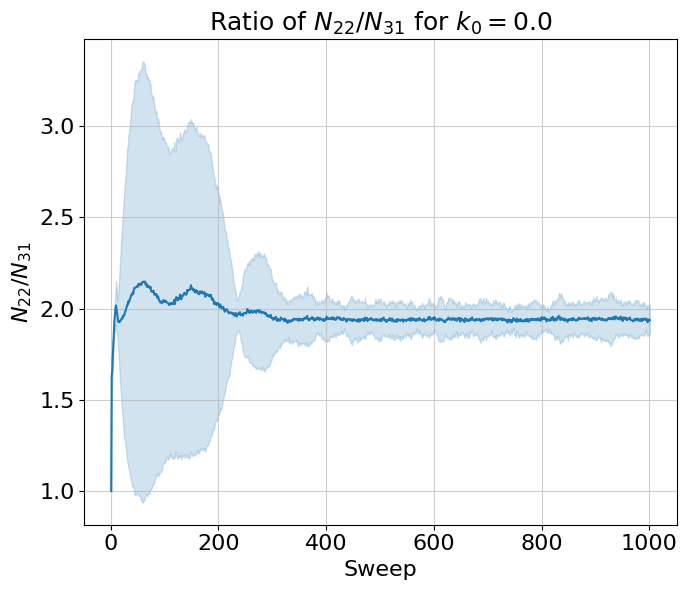

In [21]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_n22_n31, x='sweep', y='n22/n31', errorbar='sd')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('$N_{22}/N_{31}$', fontsize=16)
plt.title(f'Ratio of $N_{{22}}/N_{{31}}$ for $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/n22_n31/T{T}/N{target_volume}/T{T}_n22_n31_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/n22_n31/T{T}/N{target_volume}'):
    os.makedirs(f'plots/n22_n31/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

## Spatial coordination number (scnum)

### T=3, 5, 10 comparison

36
41
41


/tmp/ipykernel_23726/4006780497.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


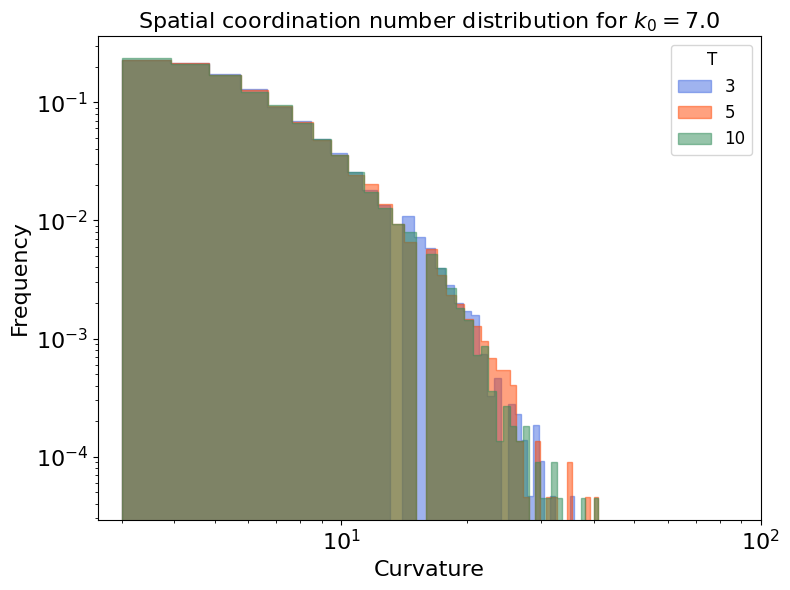

In [86]:
plt.figure(figsize=(8, 6))

target_volume = 3000
k0 = 7.0

for i, T in enumerate(T_values):
    path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
    filepaths_curvature = glob.glob(f'{path}/*curvature.npy')
    curvature = []
    for filepath in filepaths_curvature:
        data = np.load(filepath, allow_pickle=True)
        last_sweep = data[-1].values()
        curvature.extend([value for sublist in last_sweep for value in sublist])

    max_curvature = max(curvature)
    print(max_curvature)

    # Make a histogram of the curvature values 
    plt.hist(curvature, bins=max_curvature, color=colors[i], label=f'{T}', log=True,
             histtype='stepfilled', alpha=0.5, density=True, edgecolor=colors[i])

plt.xscale('log')
plt.xlim(0, 100)
plt.xlabel('Curvature', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title(f'Spatial coordination number distribution for $k_0={k0}$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(title='T', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/scnum/compare_scnum_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

### Ñ31 = 3000, 6000, 9000 comparison

<>:30: SyntaxWarning: invalid escape sequence '\w'
<>:30: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_23726/3329370175.py:30: SyntaxWarning: invalid escape sequence '\w'
  plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)


65
84
122


/tmp/ipykernel_23726/3329370175.py:24: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 150)


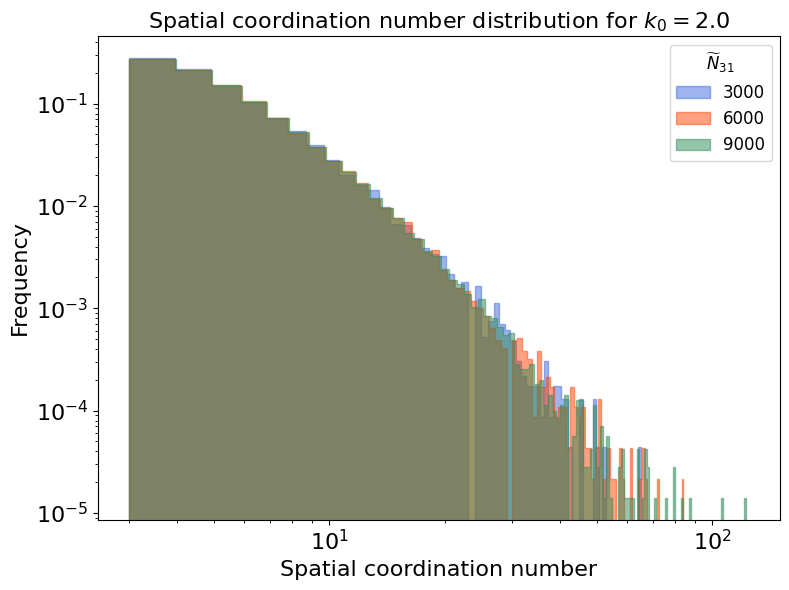

In [61]:
plt.figure(figsize=(8, 6))

T = 3

for i, N31 in enumerate(N31_values):
    path = f'thermal_{N31}/T{T}/measurements/k0={k0}'
    filepaths_curvature = glob.glob(f'{path}/*curvature.npy')

    curvature = []
    for filepath in filepaths_curvature:
        data = np.load(filepath, allow_pickle=True)
        last_sweep = data[-1].values()
        curvature.extend([value for sublist in last_sweep for value in sublist])

    max_curvature = max(curvature)
    print(max_curvature)

    # Make a histogram of the curvature values 
    plt.hist(curvature, bins=max_curvature, color=colors[i], label=f'{N31}', log=True,
             histtype='stepfilled', alpha=0.5, density=True, edgecolor=colors[i])

plt.xscale('log')
plt.xlim(0, 150)
plt.xlabel('Spatial coordination number', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title(f'Spatial coordination number distribution for $k_0={k0}$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/scnum/compare_scnum_k0={k0}_T{T}_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

### Separate

42


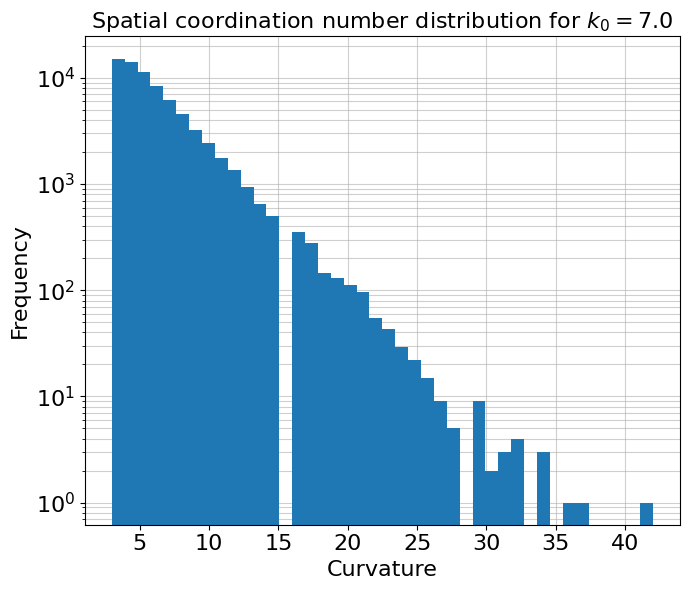

In [ ]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_curvature = glob.glob(f'{path}/*curvature.npy')

curvature = []
for filepath in filepaths_curvature:
    data = np.load(filepath, allow_pickle=True)
    last_sweep = data[-1].values()
    curvature.extend([value for sublist in last_sweep for value in sublist])

max_curvature = max(curvature)
print(max_curvature)

# Make a histogram of the curvature values 
plt.figure(figsize=(7, 6))
plt.hist(curvature, bins=max_curvature)
plt.yscale('log')
plt.xlabel('Curvature', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title(f'Spatial coordination number distribution for $k_0={k0}$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.gca().set_axisbelow(True)
plt.tight_layout()
savepath = f'plots/curvature/T{T}/N{target_volume}/scnum_T{T}_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/curvature/T{T}/N{target_volume}'):
    os.makedirs(f'plots/curvature/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

### T = 3, 5, 10

In [5]:
# Get data from T = 3, 5, 10
avg_curvature_T3 = {k: [] for k in k0_values}
avg_curvature_T5 = {k: [] for k in k0_values}
avg_curvature_T10 = {k: [] for k in k0_values}

avg_ls_curvature_T3 = {k: [] for k in k0_values}
avg_ls_curvature_T5 = {k: [] for k in k0_values}
avg_ls_curvature_T10 = {k: [] for k in k0_values}

for T in T_values:
    for k in k0_values:
        path = f'thermal_3000/T{T}/measurements/k0={k}'
        filepaths_curvature = glob.glob(f'{path}/*curvature.npy')
        
        for filepath in filepaths_curvature:
            data = np.load(filepath, allow_pickle=True)
            last_sweep = list(data[-1].values())

            # Whole geometry
            curvature = np.concatenate(last_sweep)
            avg_curvature = np.mean(curvature)
            std_curvature = np.std(curvature)

            # Find which timeslice has the maximum spatial volume
            max_spatial_volume_timeslice = np.argmax([len(timeslice) for timeslice in last_sweep])
            ls_curvature = last_sweep[max_spatial_volume_timeslice]
            avg_ls_curvature = np.mean(ls_curvature)
            
            if T == 3:
                avg_curvature_T3[k].append(avg_curvature)
                avg_ls_curvature_T3[k].append(avg_ls_curvature)
            elif T == 5:
                avg_curvature_T5[k].append(avg_curvature)
                avg_ls_curvature_T5[k].append(avg_ls_curvature)
            elif T == 10:
                avg_curvature_T10[k].append(avg_curvature)
                avg_ls_curvature_T10[k].append(avg_ls_curvature)

# Make it a df
df_avg_curvature_T3 = pd.DataFrame(avg_curvature_T3).T
df_avg_curvature_T5 = pd.DataFrame(avg_curvature_T5).T
df_avg_curvature_T10 = pd.DataFrame(avg_curvature_T10).T

df_avg_ls_curvature_T3 = pd.DataFrame(avg_ls_curvature_T3).T
df_avg_ls_curvature_T5 = pd.DataFrame(avg_ls_curvature_T5).T
df_avg_ls_curvature_T10 = pd.DataFrame(avg_ls_curvature_T10).T

for df in [df_avg_curvature_T3, df_avg_curvature_T5, df_avg_curvature_T10, df_avg_ls_curvature_T3, df_avg_ls_curvature_T5, df_avg_ls_curvature_T10]:
    df.index.name = 'k0'
    df.columns.name = 'chain'
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)

df_avg_curvature_T3

chain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,mean,std
k0,,,,,,,,,,,,,,,,,,
0.0,5.976608,5.975342,5.976206,5.976000,5.975000,5.975104,5.976175,5.976893,5.975494,5.976111,5.976080,5.976849,5.976471,5.976729,5.975087,5.975643,5.975987,0.000622
1.0,5.976032,5.975052,5.975936,5.975477,5.976238,5.975855,5.976893,5.976879,5.976923,5.974648,5.976206,5.975258,5.976032,5.976623,5.975839,5.976834,5.976045,0.000670
2.0,5.975359,5.977172,5.975968,5.976048,5.975984,5.975741,5.976654,5.977287,5.974522,5.975577,5.977273,5.976547,5.975138,5.976316,5.974395,5.975155,5.975946,0.000877
3.0,5.974377,5.976080,5.976789,5.977358,5.975920,5.975593,5.976206,5.975626,5.975052,5.976347,5.976714,5.976501,5.975427,5.976000,5.976016,5.976654,5.976041,0.000706
4.0,5.975241,5.976285,5.976864,5.975676,5.976127,5.976608,5.975887,5.977026,5.976864,5.975309,5.976378,5.975121,5.975224,5.975626,5.975207,5.975155,5.975912,0.000664
5.0,5.975443,5.976206,5.975626,5.975741,5.977528,5.975774,5.975224,5.975543,5.975741,5.974808,5.974930,5.975410,5.974860,5.976424,5.975309,5.976562,5.975696,0.000686
6.0,5.975725,5.976096,5.976908,5.975984,5.976347,5.976623,5.976593,5.976000,5.976378,5.976175,5.977026,5.976486,5.975709,5.977011,5.975593,5.975626,5.976268,0.000468
7.0,5.975806,5.975275,5.975172,5.977764,5.976111,5.973723,5.974341,5.976639,5.973626,5.975104,5.975017,5.977085,5.975155,5.975871,5.975676,5.975207,5.975473,0.001070


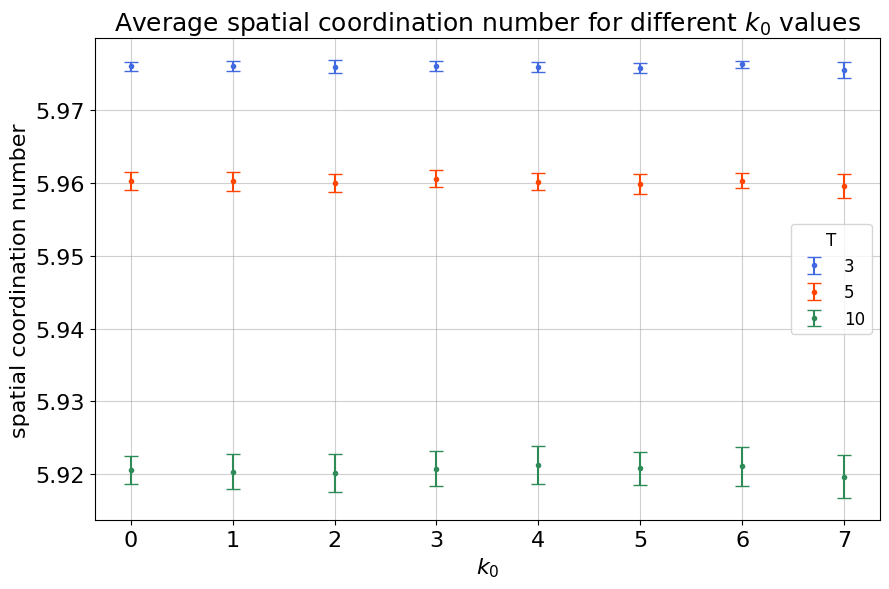

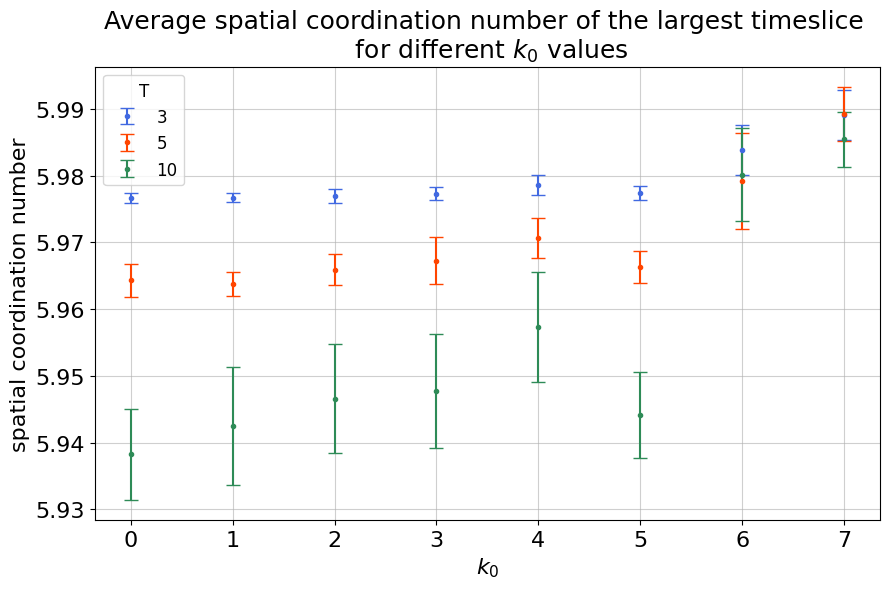

In [6]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(9, 6))
plt.errorbar(df_avg_curvature_T3.index, df_avg_curvature_T3['mean'], yerr=df_avg_curvature_T3['std'], fmt='.', capsize=5, label=3, color=colors[0])
plt.errorbar(df_avg_curvature_T5.index, df_avg_curvature_T5['mean'], yerr=df_avg_curvature_T5['std'], fmt='.', capsize=5, label=5, color=colors[1])
plt.errorbar(df_avg_curvature_T10.index, df_avg_curvature_T10['mean'], yerr=df_avg_curvature_T10['std'], fmt='.', capsize=5, label=10, color=colors[2])
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('spatial coordination number', fontsize=16)
plt.title(f'Average spatial coordination number for different $k_0$ values', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='T', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/scnum/compare_scnum_k0_N3000_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

# Plot the chains average with the standard deviation for the timeslice with the maximum spatial volume
plt.figure(figsize=(9, 6))
plt.errorbar(df_avg_ls_curvature_T3.index, df_avg_ls_curvature_T3['mean'], yerr=df_avg_ls_curvature_T3['std'], fmt='.', capsize=5, label=3, color=colors[0])
plt.errorbar(df_avg_ls_curvature_T5.index, df_avg_ls_curvature_T5['mean'], yerr=df_avg_ls_curvature_T5['std'], fmt='.', capsize=5, label=5, color=colors[1])
plt.errorbar(df_avg_ls_curvature_T10.index, df_avg_ls_curvature_T10['mean'], yerr=df_avg_ls_curvature_T10['std'], fmt='.', capsize=5, label=10, color=colors[2])
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('spatial coordination number', fontsize=16)
plt.title(f'Average spatial coordination number of the largest timeslice \n for different $k_0$ values', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='T', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/scnum/largest_compare_scnum_k0_N3000_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

#### Kruskal-Wallis

In [101]:
# Perform kw test for all k0 to check if there is a significant difference between the medians
result = kruskal(df_avg_curvature_T3['mean'], df_avg_curvature_T5['mean'], df_avg_curvature_T10['mean'])
print(result)

# Save the result to a file
with open(f'plots/curvature/scnum/kw_results_N3000_tswps={thermal_sweeps}.txt', 'w') as f:
    f.write(f'Kruskal-Wallis test for average spatial coordination number values for T=3,5,10\n')
    f.write(f'F-value: {result[0]}\n')
    f.write(f'p-value: {result[1]}\n')

KruskalResult(statistic=20.480000000000004, pvalue=3.571284964163516e-05)


### Ñ31 = 3000, 6000, 9000

In [7]:
# Get data from N31 = 3000, 6000, 9000
avg_curvature_3000 = {k: [] for k in k0_values}
avg_curvature_6000 = {k: [] for k in k0_values}
avg_curvature_9000 = {k: [] for k in k0_values}

avg_ls_curvature_3000 = {k: [] for k in k0_values}
avg_ls_curvature_6000 = {k: [] for k in k0_values}
avg_ls_curvature_9000 = {k: [] for k in k0_values}

for N31 in N31_values:
    for k in k0_values:
        path = f'thermal_{N31}/T3/measurements/k0={k}'
        filepaths_curvature = glob.glob(f'{path}/*curvature.npy')
        
        for filepath in filepaths_curvature:
            data = np.load(filepath, allow_pickle=True)
            last_sweep = list(data[-1].values())

            # Whole geometry
            curvature = np.concatenate(last_sweep)
            avg_curvature = np.mean(curvature)
            std_curvature = np.std(curvature)

            # Find which timeslice has the maximum spatial volume
            max_spatial_volume_timeslice = np.argmax([len(timeslice) for timeslice in last_sweep])
            ls_curvature = last_sweep[max_spatial_volume_timeslice]
            avg_ls_curvature = np.mean(ls_curvature)
            
            if N31 == 3000:
                avg_curvature_3000[k].append(avg_curvature)
                avg_ls_curvature_3000[k].append(avg_ls_curvature)
            elif N31 == 6000:
                avg_curvature_6000[k].append(avg_curvature)
                avg_ls_curvature_6000[k].append(avg_ls_curvature)
            elif N31 == 9000:
                avg_curvature_9000[k].append(avg_curvature)
                avg_ls_curvature_9000[k].append(avg_ls_curvature)

# Make it a df
df_avg_curvature_3000 = pd.DataFrame(avg_curvature_3000).T
df_avg_curvature_6000 = pd.DataFrame(avg_curvature_6000).T
df_avg_curvature_9000 = pd.DataFrame(avg_curvature_9000).T

df_avg_ls_curvature_3000 = pd.DataFrame(avg_ls_curvature_3000).T
df_avg_ls_curvature_6000 = pd.DataFrame(avg_ls_curvature_6000).T
df_avg_ls_curvature_9000 = pd.DataFrame(avg_ls_curvature_9000).T

for df in [df_avg_curvature_3000, df_avg_curvature_6000, df_avg_curvature_9000, df_avg_ls_curvature_3000, df_avg_ls_curvature_6000, df_avg_ls_curvature_9000]:
    df.index.name = 'k0'
    df.columns.name = 'chain'
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)

df_avg_curvature_3000

chain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,mean,std
k0,,,,,,,,,,,,,,,,,,
0.0,5.976608,5.975342,5.976206,5.976000,5.975000,5.975104,5.976175,5.976893,5.975494,5.976111,5.976080,5.976849,5.976471,5.976729,5.975087,5.975643,5.975987,0.000622
1.0,5.976032,5.975052,5.975936,5.975477,5.976238,5.975855,5.976893,5.976879,5.976923,5.974648,5.976206,5.975258,5.976032,5.976623,5.975839,5.976834,5.976045,0.000670
2.0,5.975359,5.977172,5.975968,5.976048,5.975984,5.975741,5.976654,5.977287,5.974522,5.975577,5.977273,5.976547,5.975138,5.976316,5.974395,5.975155,5.975946,0.000877
3.0,5.974377,5.976080,5.976789,5.977358,5.975920,5.975593,5.976206,5.975626,5.975052,5.976347,5.976714,5.976501,5.975427,5.976000,5.976016,5.976654,5.976041,0.000706
4.0,5.975241,5.976285,5.976864,5.975676,5.976127,5.976608,5.975887,5.977026,5.976864,5.975309,5.976378,5.975121,5.975224,5.975626,5.975207,5.975155,5.975912,0.000664
5.0,5.975443,5.976206,5.975626,5.975741,5.977528,5.975774,5.975224,5.975543,5.975741,5.974808,5.974930,5.975410,5.974860,5.976424,5.975309,5.976562,5.975696,0.000686
6.0,5.975725,5.976096,5.976908,5.975984,5.976347,5.976623,5.976593,5.976000,5.976378,5.976175,5.977026,5.976486,5.975709,5.977011,5.975593,5.975626,5.976268,0.000468
7.0,5.975806,5.975275,5.975172,5.977764,5.976111,5.973723,5.974341,5.976639,5.973626,5.975104,5.975017,5.977085,5.975155,5.975871,5.975676,5.975207,5.975473,0.001070


<>:12: SyntaxWarning: invalid escape sequence '\w'
<>:28: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\w'
<>:28: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_303/3782616784.py:12: SyntaxWarning: invalid escape sequence '\w'
  plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)
/tmp/ipykernel_303/3782616784.py:28: SyntaxWarning: invalid escape sequence '\w'
  plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)


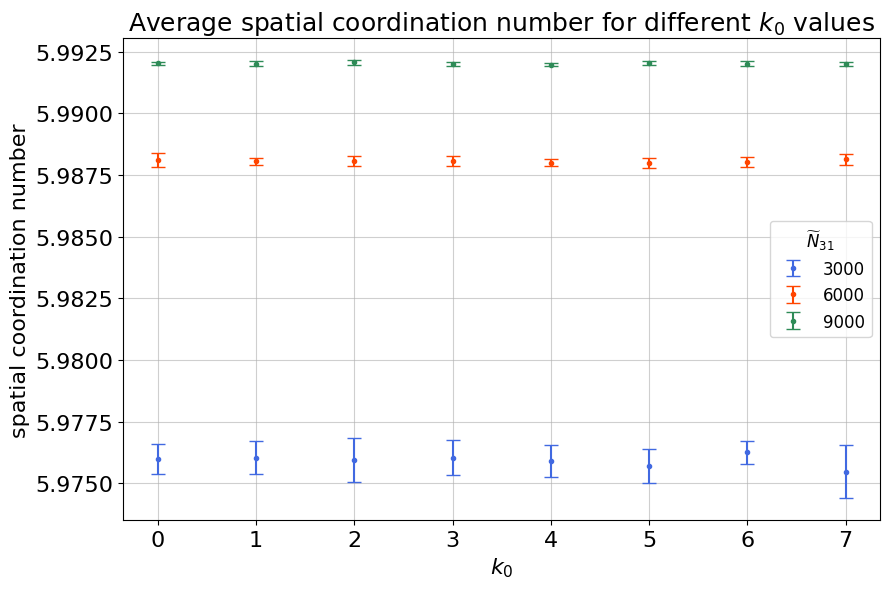

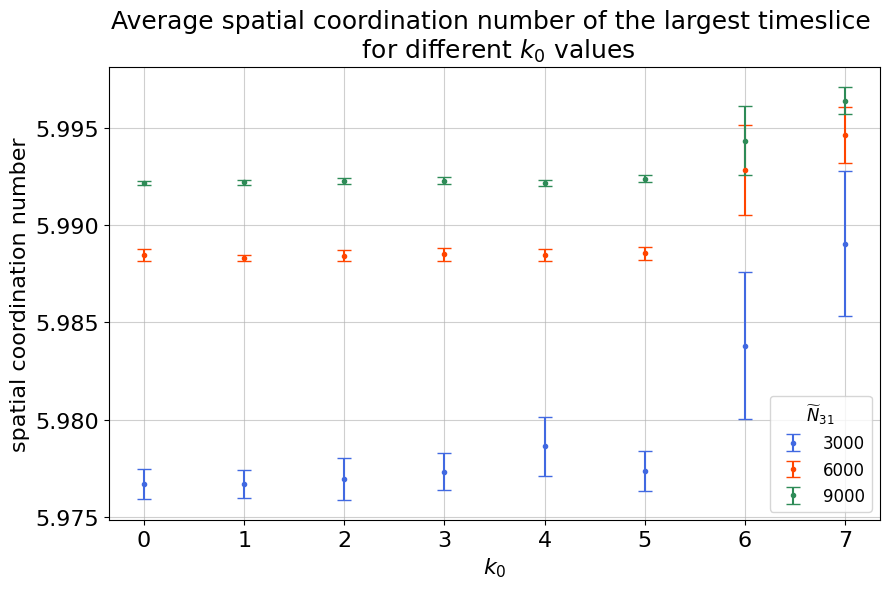

In [8]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(9, 6))
plt.errorbar(df_avg_curvature_3000.index, df_avg_curvature_3000['mean'], yerr=df_avg_curvature_3000['std'], fmt='.', capsize=5, label=3000, color=colors[0])
plt.errorbar(df_avg_curvature_6000.index, df_avg_curvature_6000['mean'], yerr=df_avg_curvature_6000['std'], fmt='.', capsize=5, label=6000, color=colors[1])
plt.errorbar(df_avg_curvature_9000.index, df_avg_curvature_9000['mean'], yerr=df_avg_curvature_9000['std'], fmt='.', capsize=5, label=9000, color=colors[2])
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('spatial coordination number', fontsize=16)
plt.title(f'Average spatial coordination number for different $k_0$ values', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/scnum/compare_scnum_k0_T3_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

# Plot the chains average with the standard deviation for the timeslice with the maximum spatial volume
plt.figure(figsize=(9, 6))
plt.errorbar(df_avg_ls_curvature_3000.index, df_avg_ls_curvature_3000['mean'], yerr=df_avg_ls_curvature_3000['std'], fmt='.', capsize=5, label=3000, color=colors[0])
plt.errorbar(df_avg_ls_curvature_6000.index, df_avg_ls_curvature_6000['mean'], yerr=df_avg_ls_curvature_6000['std'], fmt='.', capsize=5, label=6000, color=colors[1])
plt.errorbar(df_avg_ls_curvature_9000.index, df_avg_ls_curvature_9000['mean'], yerr=df_avg_ls_curvature_9000['std'], fmt='.', capsize=5, label=9000, color=colors[2])
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('spatial coordination number', fontsize=16)
plt.title(f'Average spatial coordination number of the largest timeslice \n for different $k_0$ values', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/scnum/largest_compare_scnum_k0_T3_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

#### Kruskal-Wallis

In [104]:
# Perform kw test for all k0 to check if there is a significant difference between the medians
result = kruskal(df_avg_curvature_3000['mean'], df_avg_curvature_6000['mean'], df_avg_curvature_9000['mean'])
print(result)

# Save the result to a file
with open(f'plots/curvature/scnum/kw_results_T3_tswps={thermal_sweeps}.txt', 'w') as f:
    f.write(f'Kruskal-Wallis test for average spatial coordination number values for Ñ31=3000,6000,9000\n')
    f.write(f'F-value: {result[0]}\n')
    f.write(f'p-value: {result[1]}\n')

KruskalResult(statistic=20.480000000000004, pvalue=3.571284964163516e-05)


### Separate

In [ ]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_curvature = glob.glob(f'{path}/*curvature.npy')

avg_curvature = {chain: [] for chain in range(chains)}
std_curvature = {chain: [] for chain in range(chains)}
curvature = {}

for i in range(chains):
    curvature_data = np.load(filepaths_curvature[i], allow_pickle=True)
    final_added_values = []
    for data in curvature_data:
        added_values = []
        for key, value in data.items():
            # Add the values together in 1 list
            added_values += value

        # Calculate the average and std of the curvature
        avg_curvature[i].append(np.mean(added_values))
        std_curvature[i].append(np.std(added_values))
        

# Make it a df to plot easily the mean and std
df_avg_curvature = pd.DataFrame(avg_curvature).T
df_avg_curvature.index.name = 'chain'
df_avg_curvature.columns.name = 'sweep'
df_avg_curvature = df_avg_curvature.melt(var_name='sweep', value_name='avg_curvature', ignore_index=False).reset_index()
df_avg_curvature



,chain,sweep,avg_curvature
0,0,0,3.600000
1,1,0,3.600000
2,2,0,3.600000
3,3,0,3.600000
4,4,0,3.600000
...,...,...,...
16011,11,1000,5.977085
16012,12,1000,5.975155
16013,13,1000,5.975871
16014,14,1000,5.975676


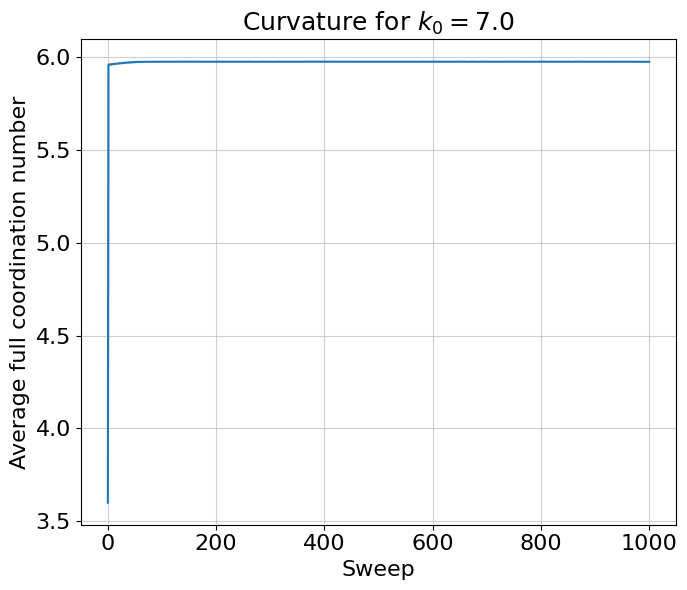

In [ ]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_avg_curvature, x='sweep', y='avg_curvature', errorbar='sd')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Average full coordination number', fontsize=16)
plt.title(f'Curvature for $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/curvature/T{T}/N{target_volume}/T{T}_curvature_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/curvature/T{T}/N{target_volume}'):
    os.makedirs(f'plots/curvature/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

### Outliers

In [89]:
# T = 3, 5, 10
avg_outliers_T3 = {k: [] for k in k0_values}
avg_outliers_T5 = {k: [] for k in k0_values}
avg_outliers_T10 = {k: [] for k in k0_values}

avg_ls_outliers_T3 = {k: [] for k in k0_values}
avg_ls_outliers_T5 = {k: [] for k in k0_values}
avg_ls_outliers_T10 = {k: [] for k in k0_values}

for T in T_values:
    for k in k0_values:
        path = f'thermal_3000/T{T}/measurements/k0={k}'
        filepaths_curvature = glob.glob(f'{path}/*curvature.npy')
        
        for filepath in filepaths_curvature:
            data = np.load(filepath, allow_pickle=True)
            last_sweep = list(data[-1].values())

            # Whole geometry
            curvature = np.concatenate(last_sweep)
            max_curvature = np.max(curvature)

            # Find which timeslice has the maximum spatial volume
            max_spatial_volume_timeslice = np.argmax([len(timeslice) for timeslice in last_sweep])
            ls_curvature = last_sweep[max_spatial_volume_timeslice]
            max_ls_curvature = np.max(ls_curvature)
            
            if T == 3:
                avg_outliers_T3[k].append(max_curvature)
                avg_ls_outliers_T3[k].append(max_ls_curvature)
            elif T == 5:
                avg_outliers_T5[k].append(max_curvature)
                avg_ls_outliers_T5[k].append(max_ls_curvature)
            elif T == 10:
                avg_outliers_T10[k].append(max_curvature)
                avg_ls_outliers_T10[k].append(max_ls_curvature)

# Make it a df
df_avg_outliers_T3 = pd.DataFrame(avg_outliers_T3).T
df_avg_outliers_T5 = pd.DataFrame(avg_outliers_T5).T
df_avg_outliers_T10 = pd.DataFrame(avg_outliers_T10).T

df_avg_ls_outliers_T3 = pd.DataFrame(avg_ls_outliers_T3).T
df_avg_ls_outliers_T5 = pd.DataFrame(avg_ls_outliers_T5).T
df_avg_ls_outliers_T10 = pd.DataFrame(avg_ls_outliers_T10).T

for df in [df_avg_outliers_T3, df_avg_outliers_T5, df_avg_outliers_T10, df_avg_ls_outliers_T3, df_avg_ls_outliers_T5, df_avg_ls_outliers_T10]:
    df.index.name = 'k0'
    df.columns.name = 'chain'
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)

df_avg_outliers_T3

chain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,mean,std
k0,,,,,,,,,,,,,,,,,,
0.0,50,41,40,47,39,34,38,34,39,48,57,32,35,46,42,33,40.9375,6.823386
1.0,31,44,46,39,41,43,48,54,43,42,33,58,45,51,34,48,43.7500,7.119515
2.0,49,50,42,49,41,37,38,45,65,41,45,49,43,39,40,52,45.3125,6.798150
3.0,57,49,51,58,36,54,57,58,40,43,61,47,42,43,38,44,48.6250,7.833223
4.0,54,49,50,89,55,57,50,57,37,55,48,81,59,43,46,46,54.7500,12.798926
5.0,51,50,43,56,59,55,72,42,52,52,41,44,59,56,74,50,53.5000,9.226321
6.0,25,46,55,55,53,33,50,47,95,46,61,57,49,74,62,60,54.2500,15.290929
7.0,23,30,28,36,27,29,29,27,25,24,24,30,24,24,26,26,27.0000,3.221025


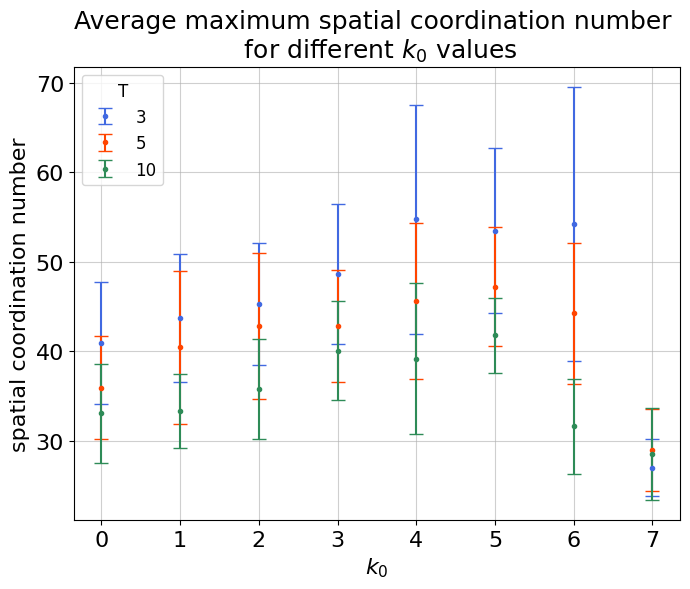

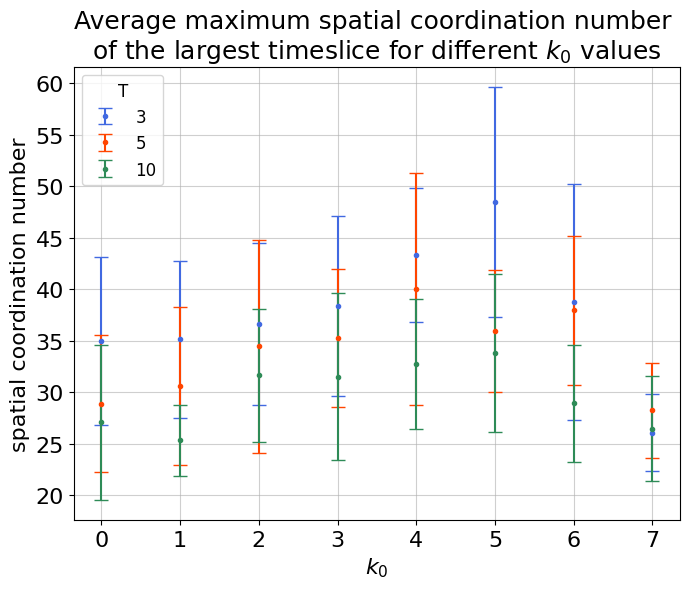

In [93]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
plt.errorbar(df_avg_outliers_T3.index, df_avg_outliers_T3['mean'], yerr=df_avg_outliers_T3['std'],  fmt='.', capsize=5, label=3, color=colors[0])
plt.errorbar(df_avg_outliers_T5.index, df_avg_outliers_T5['mean'], yerr=df_avg_outliers_T5['std'],  fmt='.', capsize=5, label=5, color=colors[1])
plt.errorbar(df_avg_outliers_T10.index, df_avg_outliers_T10['mean'], yerr=df_avg_outliers_T10['std'],  fmt='.', capsize=5, label=10, color=colors[2])
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('spatial coordination number', fontsize=16)
plt.title(f'Average maximum spatial coordination number \n for different $k_0$ values', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='T', fancybox=True, loc='upper left', fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/scnum/compare_max_scnum_k0_N3000_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

# Plot the chains average with the standard deviation for the timeslice with the maximum spatial volume
plt.figure(figsize=(7, 6))
plt.errorbar(df_avg_ls_outliers_T3.index, df_avg_ls_outliers_T3['mean'], yerr=df_avg_ls_outliers_T3['std'],  fmt='.', capsize=5, label=3, color=colors[0])
plt.errorbar(df_avg_ls_outliers_T5.index, df_avg_ls_outliers_T5['mean'], yerr=df_avg_ls_outliers_T5['std'],  fmt='.', capsize=5, label=5, color=colors[1])
plt.errorbar(df_avg_ls_outliers_T10.index, df_avg_ls_outliers_T10['mean'], yerr=df_avg_ls_outliers_T10['std'],  fmt='.', capsize=5, label=10, color=colors[2])
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('spatial coordination number', fontsize=16)
plt.title(f'Average maximum spatial coordination number \nof the largest timeslice for different $k_0$ values', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='T', fancybox=True, loc='upper left', fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/scnum/largest_compare_max_scnum_k0_N3000_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

#### STATISTICS

### Ñ31 = 3000, 6000, 9000

In [91]:
# Ñ31 = 3000, 6000, 9000
avg_outliers_3000 = {k: [] for k in k0_values}
avg_outliers_6000 = {k: [] for k in k0_values}
avg_outliers_9000 = {k: [] for k in k0_values}

avg_ls_outliers_3000 = {k: [] for k in k0_values}
avg_ls_outliers_6000 = {k: [] for k in k0_values}
avg_ls_outliers_9000 = {k: [] for k in k0_values}

for N31 in N31_values:
    for k in k0_values:
        path = f'thermal_{N31}/T3/measurements/k0={k}'
        filepaths_curvature = glob.glob(f'{path}/*curvature.npy')
        
        for filepath in filepaths_curvature:
            data = np.load(filepath, allow_pickle=True)
            last_sweep = list(data[-1].values())

            # Whole geometry
            curvature = np.concatenate(last_sweep)
            max_curvature = np.max(curvature)

            # Find which timeslice has the maximum spatial volume
            max_spatial_volume_timeslice = np.argmax([len(timeslice) for timeslice in last_sweep])
            ls_curvature = last_sweep[max_spatial_volume_timeslice]
            max_ls_curvature = np.max(ls_curvature)
            
            if N31 == 3000:
                avg_outliers_3000[k].append(max_curvature)
                avg_ls_outliers_3000[k].append(max_ls_curvature)
            elif N31 == 6000:
                avg_outliers_6000[k].append(max_curvature)
                avg_ls_outliers_6000[k].append(max_ls_curvature)
            elif N31 == 9000:
                avg_outliers_9000[k].append(max_curvature)
                avg_ls_outliers_9000[k].append(max_ls_curvature)

# Make it a df
df_avg_outliers_3000 = pd.DataFrame(avg_outliers_3000).T
df_avg_outliers_6000 = pd.DataFrame(avg_outliers_6000).T
df_avg_outliers_9000 = pd.DataFrame(avg_outliers_9000).T

df_avg_ls_outliers_3000 = pd.DataFrame(avg_ls_outliers_3000).T
df_avg_ls_outliers_6000 = pd.DataFrame(avg_ls_outliers_6000).T
df_avg_ls_outliers_9000 = pd.DataFrame(avg_ls_outliers_9000).T

for df in [df_avg_outliers_3000, df_avg_outliers_6000, df_avg_outliers_9000, df_avg_ls_outliers_3000, df_avg_ls_outliers_6000, df_avg_ls_outliers_9000]:
    df.index.name = 'k0'
    df.columns.name = 'chain'
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)

df_avg_outliers_3000

chain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,mean,std
k0,,,,,,,,,,,,,,,,,,
0.0,50,41,40,47,39,34,38,34,39,48,57,32,35,46,42,33,40.9375,6.823386
1.0,31,44,46,39,41,43,48,54,43,42,33,58,45,51,34,48,43.7500,7.119515
2.0,49,50,42,49,41,37,38,45,65,41,45,49,43,39,40,52,45.3125,6.798150
3.0,57,49,51,58,36,54,57,58,40,43,61,47,42,43,38,44,48.6250,7.833223
4.0,54,49,50,89,55,57,50,57,37,55,48,81,59,43,46,46,54.7500,12.798926
5.0,51,50,43,56,59,55,72,42,52,52,41,44,59,56,74,50,53.5000,9.226321
6.0,25,46,55,55,53,33,50,47,95,46,61,57,49,74,62,60,54.2500,15.290929
7.0,23,30,28,36,27,29,29,27,25,24,24,30,24,24,26,26,27.0000,3.221025


<>:12: SyntaxWarning: invalid escape sequence '\w'
<>:28: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\w'
<>:28: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_23726/2254696885.py:12: SyntaxWarning: invalid escape sequence '\w'
  plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, loc='upper left', fontsize=12, title_fontsize=12)
/tmp/ipykernel_23726/2254696885.py:28: SyntaxWarning: invalid escape sequence '\w'
  plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, loc='upper left', fontsize=12, title_fontsize=12)


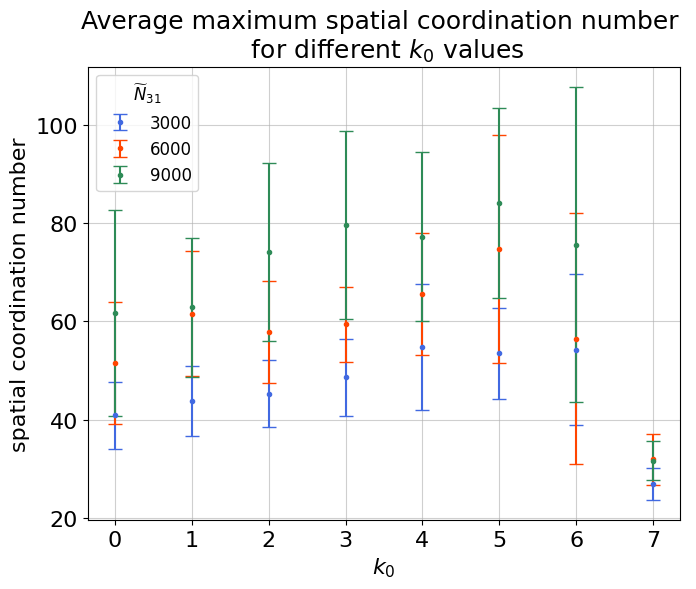

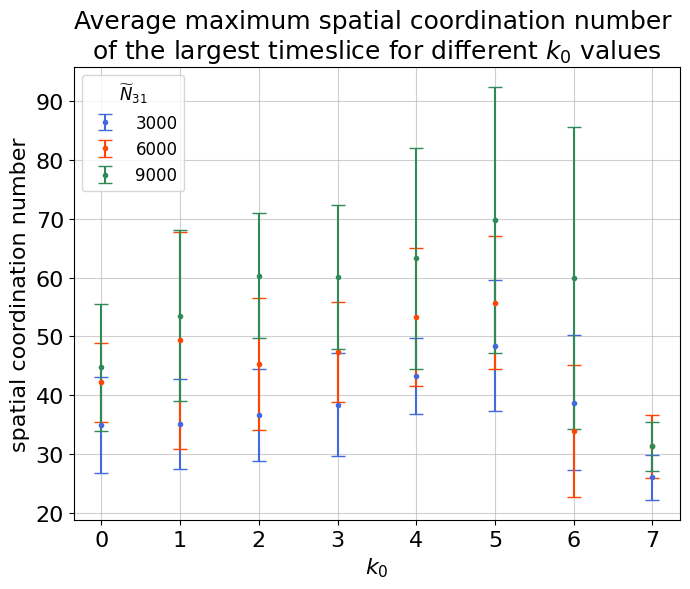

In [92]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
plt.errorbar(df_avg_outliers_3000.index, df_avg_outliers_3000['mean'], yerr=df_avg_outliers_3000['std'],  fmt='.', capsize=5, label=3000, color=colors[0])
plt.errorbar(df_avg_outliers_6000.index, df_avg_outliers_6000['mean'], yerr=df_avg_outliers_6000['std'],  fmt='.', capsize=5, label=6000, color=colors[1])
plt.errorbar(df_avg_outliers_9000.index, df_avg_outliers_9000['mean'], yerr=df_avg_outliers_9000['std'],  fmt='.', capsize=5, label=9000, color=colors[2])
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('spatial coordination number', fontsize=16)
plt.title(f'Average maximum spatial coordination number \n for different $k_0$ values', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, loc='upper left', fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/scnum/compare_max_scnum_k0_T3_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

# Plot the chains average with the standard deviation for the timeslice with the maximum spatial volume
plt.figure(figsize=(7, 6))
plt.errorbar(df_avg_ls_outliers_3000.index, df_avg_ls_outliers_3000['mean'], yerr=df_avg_ls_outliers_3000['std'],  fmt='.', capsize=5, label=3000, color=colors[0])
plt.errorbar(df_avg_ls_outliers_6000.index, df_avg_ls_outliers_6000['mean'], yerr=df_avg_ls_outliers_6000['std'],  fmt='.', capsize=5, label=6000, color=colors[1])
plt.errorbar(df_avg_ls_outliers_9000.index, df_avg_ls_outliers_9000['mean'], yerr=df_avg_ls_outliers_9000['std'],  fmt='.', capsize=5, label=9000, color=colors[2])
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('spatial coordination number', fontsize=16)
plt.title(f'Average maximum spatial coordination number \nof the largest timeslice for different $k_0$ values', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, loc='upper left', fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/scnum/largest_compare_max_scnum_k0_T3_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

#### STATISTICS

In [110]:
# Perform kw test for all k0 to check if there is a significant difference between the medians
result = kruskal(df_avg_outliers_3000['mean'], df_avg_outliers_6000['mean'], df_avg_outliers_9000['mean'])
print(result)

#TODO: Check for variance differences with Levene's test ?


# Save the result to a file
with open(f'plots/curvature/scnum/kw_outliers_results_T3_tswps={thermal_sweeps}.txt', 'w') as f:
    f.write(f'Kruskal-Wallis test for average max. spatial coordination number values for Ñ31=3000,6000,9000\n')
    f.write(f'F-value: {result[0]}\n')
    f.write(f'p-value: {result[1]}\n')

KruskalResult(statistic=10.385000000000005, pvalue=0.005558094195902608)


### Separate

In [ ]:
# Add all data for at each sweep together from each chain
tmp1 = []
for i in range(chains):
    curvature_data = np.load(filepaths_curvature[i], allow_pickle=True)
    added = []
    # print(curvature_data)

    for d in curvature_data:
        tmp2 = []
        for value in d.values():
            tmp2 += value
        added.append(tmp2)
    tmp1.append(added)

curvature = [list(sum(zip(*sublists), ())) for sublists in zip(*tmp1)]

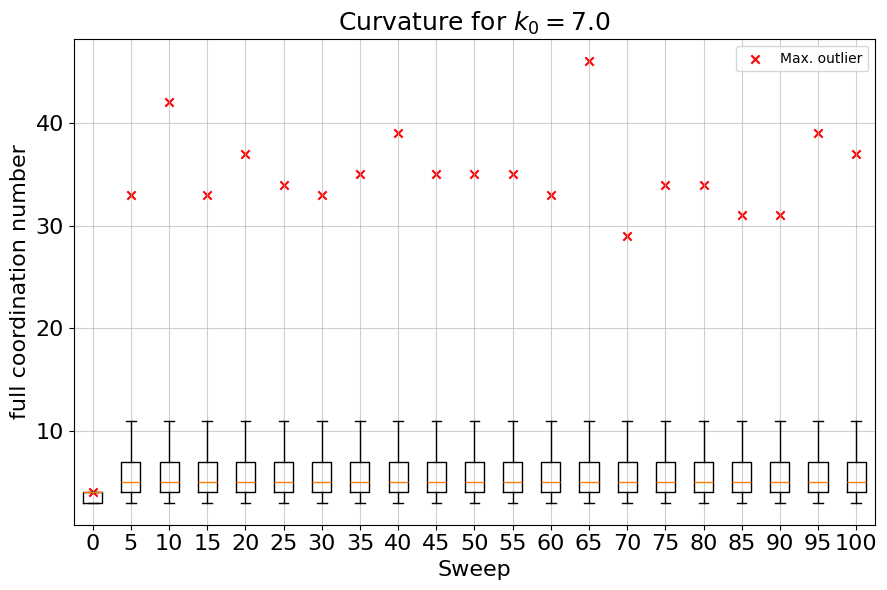

In [ ]:
# Plot boxplots of the curvature for every 5 sweeps
sweeps_display = np.arange(0, 101, 5)
boxplot_data = [curvature[i] for i in sweeps_display]
plt.figure(figsize=(9, 6))
plt.boxplot(boxplot_data, showfliers=False)
# Manual plotting of maximum outliers
max_outliers = [np.max(data) for data in boxplot_data]
plt.scatter(np.arange(1, len(sweeps_display) + 1), max_outliers, marker='x', color='red', label='Max. outlier')
plt.xticks(range(1, len(sweeps_display) + 1), sweeps_display)
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Spatial coordination number', fontsize=16)
plt.title(f'Curvature for $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(np.arange(1, len(thermal_sweeps)), fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend()
plt.tight_layout()
savepath = f'plots/curvature/T{T}/N{target_volume}/T{T}_curvature_boxplot_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/curvature/T{T}/N{target_volume}'):
    os.makedirs(f'plots/curvature/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

## Coordination number (cnum)

### Histograms

### T = 3, 5, 10

/tmp/ipykernel_23726/4020714840.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 2000)


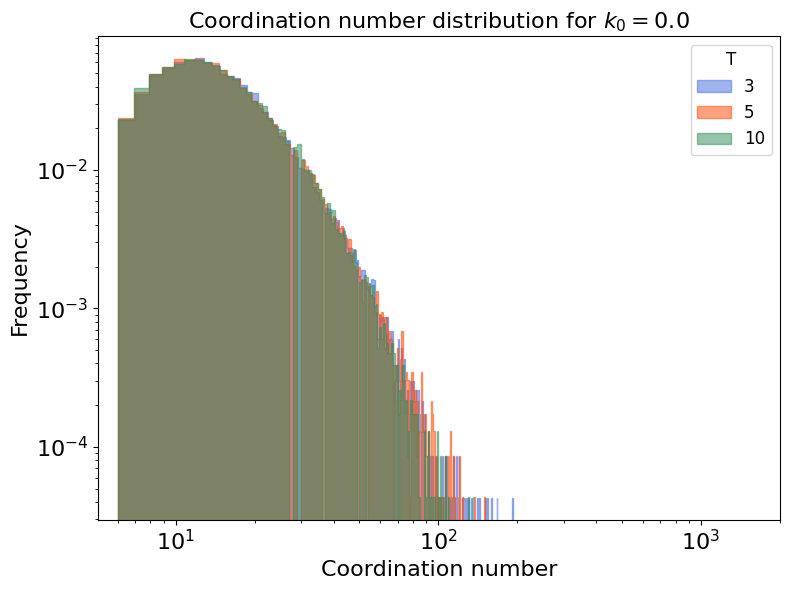

In [76]:
plt.figure(figsize=(8, 6))

target_volume = 3000
k0 = 0.0

for i, T in enumerate(T_values):
    path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
    filepaths_cnum = glob.glob(f'{path}/*connections.npy')

    cnum_tot = []
    for filepath in filepaths_cnum:
        data = np.load(filepath, allow_pickle=True).item()
        cnum = [len(value) for value in data.values()]
        cnum_tot.extend(cnum)
    
    max_cnum = max(cnum_tot)

    # Make a histogram of the curvature values 
    plt.hist(cnum_tot, bins=max_cnum, color=colors[i], label=f'{T}', log=True,
             histtype='stepfilled', alpha=0.5, density=True, edgecolor=colors[i])

plt.xscale('log')
plt.xlim(0, 2000)
plt.xlabel('Coordination number', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title(f'Coordination number distribution for $k_0={k0}$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(title='T', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/cnum/compare_cnum_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

<>:29: SyntaxWarning: invalid escape sequence '\w'
<>:29: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_23726/2723214162.py:29: SyntaxWarning: invalid escape sequence '\w'
  plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)
/tmp/ipykernel_23726/2723214162.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 5000)


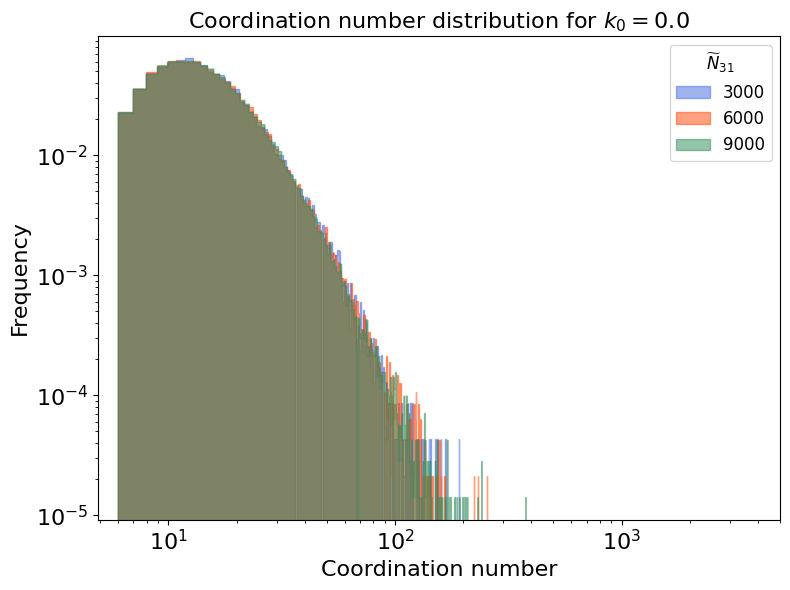

In [77]:
plt.figure(figsize=(8, 6))

T = 3
k0 = 0.0

for i, N31 in enumerate(N31_values):
    path = f'thermal_{N31}/T{T}/measurements/k0={k0}'
    filepaths_cnum = glob.glob(f'{path}/*connections.npy')

    cnum_tot = []
    for filepath in filepaths_cnum:
        data = np.load(filepath, allow_pickle=True).item()
        cnum = [len(value) for value in data.values()]
        cnum_tot.extend(cnum)
    
    max_cnum = max(cnum_tot)

    # Make a histogram of the curvature values 
    plt.hist(cnum_tot, bins=max_cnum, color=colors[i], label=f'{N31}', log=True,
             histtype='stepfilled', alpha=0.5, density=True, edgecolor=colors[i])
    
plt.xscale('log')
plt.xlim(0, 5000)
plt.xlabel('Coordination number', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title(f'Coordination number distribution for $k_0={k0}$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/cnum/compare_cnum_k0_T{T}_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

### Average and max. outliers

### T = 3, 5, 10

In [134]:
# Get data from T = 3, 5, 10
avg_cnum_T3 = {k: [] for k in k0_values}
avg_cnum_T5 = {k: [] for k in k0_values}
avg_cnum_T10 = {k: [] for k in k0_values}

avg_outliers_cnum_T3 = {k: [] for k in k0_values}
avg_outliers_cnum_T5 = {k: [] for k in k0_values}
avg_outliers_cnum_T10 = {k: [] for k in k0_values}

for T in T_values:
    for k in k0_values:
        path = f'thermal_3000/T{T}/measurements/k0={k}'
        filepaths_cnum = glob.glob(f'{path}/*connections.npy')
    
        for filepath in filepaths_cnum:
            # The length of the values of the data dictionary is the cnum
            data = np.load(filepath, allow_pickle=True).item()
            cnum = [len(value) for value in data.values()]

            max_cnum = np.max(cnum)
            avg_cnum = np.mean(cnum)
            std_cnum = np.std(cnum)

            if T == 3:
                avg_cnum_T3[k].append(avg_cnum)
                avg_outliers_cnum_T3[k].append(max_cnum)
            elif T == 5:
                avg_cnum_T5[k].append(avg_cnum)
                avg_outliers_cnum_T5[k].append(max_cnum)
            elif T == 10:
                avg_cnum_T10[k].append(avg_cnum)
                avg_outliers_cnum_T10[k].append(max_cnum)

# Make it a df
df_avg_cnum_T3 = pd.DataFrame(avg_cnum_T3).T
df_avg_cnum_T5 = pd.DataFrame(avg_cnum_T5).T
df_avg_cnum_T10 = pd.DataFrame(avg_cnum_T10).T

df_avg_outliers_cnum_T3 = pd.DataFrame(avg_outliers_cnum_T3).T
df_avg_outliers_cnum_T5 = pd.DataFrame(avg_outliers_cnum_T5).T
df_avg_outliers_cnum_T10 = pd.DataFrame(avg_outliers_cnum_T10).T

for df in [df_avg_cnum_T3, df_avg_cnum_T5, df_avg_cnum_T10, df_avg_outliers_cnum_T3, df_avg_outliers_cnum_T5, df_avg_outliers_cnum_T10]:
    df.index.name = 'k0'
    df.columns.name = 'chain'
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)

df_avg_cnum_T3

chain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,mean,std
k0,,,,,,,,,,,,,,,,,,
0.0,18.754167,18.836000,18.799743,18.746589,18.719892,18.636601,18.696085,18.881031,18.731790,18.763014,18.775415,18.860304,18.906917,18.908670,18.719031,18.765916,18.781323,0.075980
1.0,17.708389,17.803846,17.887604,17.779343,17.750704,17.922978,17.761716,17.842953,17.694158,17.924067,17.871658,17.810311,17.922343,17.872170,17.959740,17.798337,17.831895,0.078513
2.0,16.961783,16.813230,16.974717,16.696929,17.010855,16.984781,16.900977,16.859213,16.982323,16.987871,17.017070,16.835729,16.928177,17.038158,17.074448,16.989326,16.940974,0.094562
3.0,15.996587,15.927235,15.962484,16.020000,16.047302,16.010961,16.137107,16.000664,15.915369,15.953846,15.959530,15.909451,16.089356,16.110320,16.088197,15.997966,16.007898,0.068163
4.0,14.883548,14.974324,14.916452,14.977227,14.886940,14.978302,14.916094,14.844473,14.953006,14.947694,15.138546,15.052493,14.910408,15.003979,15.100551,14.846791,14.958177,0.081676
5.0,13.919450,13.770889,13.976562,13.950820,13.881793,14.110359,13.975309,13.894701,13.990579,13.970670,14.064690,13.938608,13.897555,14.104457,14.004899,13.867665,13.957438,0.086117
6.0,12.010512,11.924577,11.976267,12.425197,12.097322,11.052596,12.411525,12.207403,11.022078,12.088123,12.391132,12.045362,12.154050,12.428953,12.457333,11.611336,12.018985,0.432138
7.0,10.994490,10.984817,10.979839,10.983128,10.990117,10.985996,10.987936,10.988596,10.979562,10.981081,10.986121,10.985348,10.986264,10.981420,10.988966,10.988935,10.985788,0.003960


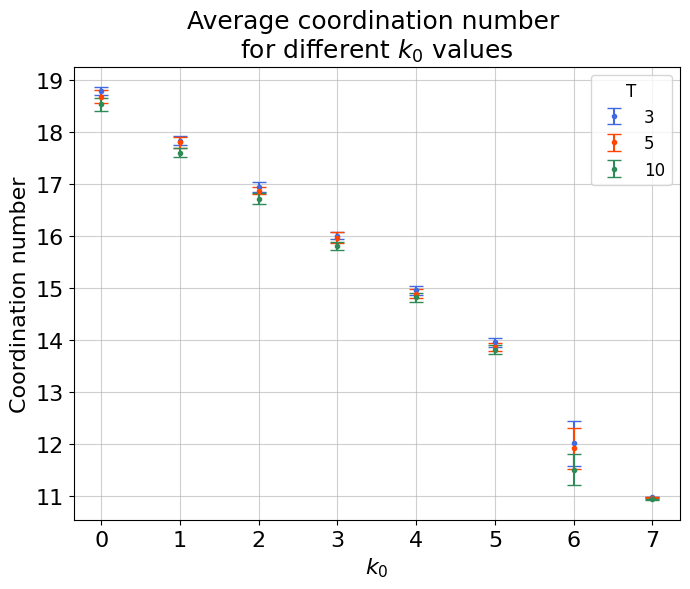

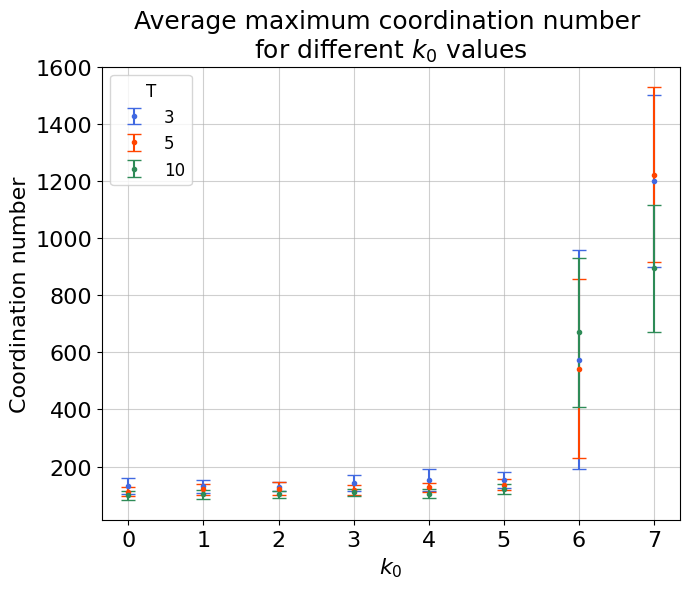

In [138]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
plt.errorbar(df_avg_cnum_T3.index, df_avg_cnum_T3['mean'], yerr=df_avg_cnum_T3['std'], fmt='.', capsize=5, label=3, color=colors[0])
plt.errorbar(df_avg_cnum_T5.index, df_avg_cnum_T5['mean'], yerr=df_avg_cnum_T5['std'], fmt='.', capsize=5, label=5, color=colors[1])
plt.errorbar(df_avg_cnum_T10.index, df_avg_cnum_T10['mean'], yerr=df_avg_cnum_T10['std'], fmt='.', capsize=5, label=10, color=colors[2])
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('Coordination number', fontsize=16)
plt.title(f'Average coordination number \nfor different $k_0$ values', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='T', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/cnum/compare_cnum_k0_N3000_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

# Plot the chains average maximum cnum with the standard deviation
plt.figure(figsize=(7, 6))
plt.errorbar(df_avg_outliers_cnum_T3.index, df_avg_outliers_cnum_T3['mean'], yerr=df_avg_outliers_cnum_T3['std'], fmt='.', capsize=5, label=3, color=colors[0])
plt.errorbar(df_avg_outliers_cnum_T5.index, df_avg_outliers_cnum_T5['mean'], yerr=df_avg_outliers_cnum_T5['std'], fmt='.', capsize=5, label=5, color=colors[1])
plt.errorbar(df_avg_outliers_cnum_T10.index, df_avg_outliers_cnum_T10['mean'], yerr=df_avg_outliers_cnum_T10['std'], fmt='.', capsize=5, label=10, color=colors[2])
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('Coordination number', fontsize=16)
plt.title(f'Average maximum coordination number \nfor different $k_0$ values', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='T', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/cnum/max_compare_cnum_k0_N3000_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

#### STATISTICS

In [97]:
# Loop through each row (each group)
for i, df in enumerate([df_avg_cnum_T3, df_avg_cnum_T5, df_avg_cnum_T10]):
    print(f"\nShapiro-Wilk Test for T={T_values[i]}")
    for k0, data_row in df.iterrows():
        # Extract the observations for the current group
        observations = data_row[:-2]  # Exclude the last two columns (mean and std)
        
        # Perform the Shapiro-Wilk test
        stat, p_value = shapiro(observations)

        print(f"k0={k0}: Shapiro-Wilk Test Statistic={stat}, p-value={p_value}")

        if p_value < 0.05:
            print(f"Reject null hypothesis for k0={k0} (p-value={p_value})")
            # Perform Kruskal-Wallis test for all k0 to check if there is a significant difference between the medians
            result = kruskal(df_avg_cnum_T3['mean'], df_avg_cnum_T5['mean'], df_avg_cnum_T10['mean'])
            print(f"Kruskal-Wallis Test Statistic={stat}, p-value={p_value}")
        else:
            print(f"Fail to reject null hypothesis for k0={k0} (p-value={p_value})")
            # Perform ANOVA test for all k0 to check if there is a significant difference between the means
            result = f_oneway(df_avg_cnum_T3['mean'], df_avg_cnum_T5['mean'], df_avg_cnum_T10['mean'])
            print(f"ANOVA Test Statistic={stat}, p-value={p_value}")

# Save the result to a file
with open(f'plots/curvature/cnum/stats_results_N31=3000_tswps={thermal_sweeps}.txt', 'w') as f:
    # Loop through each row (each group)
    for i, df in enumerate([df_avg_cnum_T3, df_avg_cnum_T5, df_avg_cnum_T10]):
        f.write(f"{'='*40}\n")
        f.write(f"Shapiro-Wilk Test for T={T_values[i]}\n")
        f.write(f"{'='*40}\n")
        for k0, data_row in df.iterrows():
            observations = data_row[:-2]
            stat, p = shapiro(observations)
            f.write(f"k0={k0}: Shapiro-Wilk Test Statistic={stat}, p-value={p_value}\n")
            if p_value < 0.05:
                f.write(f"Reject null hypothesis for k0={k0} (p-value={p_value})\n")
                result = kruskal(df_avg_cnum_T3['mean'], df_avg_cnum_T5['mean'], df_avg_cnum_T10['mean'])
                f.write(f"Kruskal-Wallis Test Statistic={stat}, p-value={p_value}\n")
            else:
                f.write(f"Fail to reject null hypothesis for k0={k0} (p-value={p_value})\n")
                result = f_oneway(df_avg_cnum_T3['mean'], df_avg_cnum_T5['mean'], df_avg_cnum_T10['mean'])
                f.write(f"ANOVA Test Statistic={stat}, p-value={p_value}\n")


Shapiro-Wilk Test for T=3
k0=0.0: Shapiro-Wilk Test Statistic=0.9532610020127688, p-value=0.5430437046941123
Fail to reject null hypothesis for k0=0.0 (p-value=0.5430437046941123)
ANOVA Test Statistic=0.9532610020127688, p-value=0.5430437046941123
k0=1.0: Shapiro-Wilk Test Statistic=0.9591675992241533, p-value=0.6467083764380425
Fail to reject null hypothesis for k0=1.0 (p-value=0.6467083764380425)
ANOVA Test Statistic=0.9591675992241533, p-value=0.6467083764380425
k0=2.0: Shapiro-Wilk Test Statistic=0.9072924674620394, p-value=0.10524878011850064
Fail to reject null hypothesis for k0=2.0 (p-value=0.10524878011850064)
ANOVA Test Statistic=0.9072924674620394, p-value=0.10524878011850064
k0=3.0: Shapiro-Wilk Test Statistic=0.9485732124620964, p-value=0.46742728390418553
Fail to reject null hypothesis for k0=3.0 (p-value=0.46742728390418553)
ANOVA Test Statistic=0.9485732124620964, p-value=0.46742728390418553
k0=4.0: Shapiro-Wilk Test Statistic=0.9413865737495644, p-value=0.3663466155839

### Violin plots

In [113]:
target_volume = 3000

all_T3 = {k: [] for k in k0_values}
all_T5 = {k: [] for k in k0_values}
all_T10 = {k: [] for k in k0_values}

for i, T in enumerate(T_values):
    for k in k0_values:
        path = f'thermal_{target_volume}/T{T}/measurements/k0={k}'
        filepaths_cnum = glob.glob(f'{path}/*connections.npy')

        # Combine all data from each chain
        cnum_tot = []
        for filepath in filepaths_cnum:
            data = np.load(filepath, allow_pickle=True).item()
            cnum = [len(value) for value in data.values()]
 
            if T == 3:
                all_T3[k] += cnum
            elif T == 5:
                all_T5[k] += cnum
            elif T == 10:
                all_T10[k] += cnum


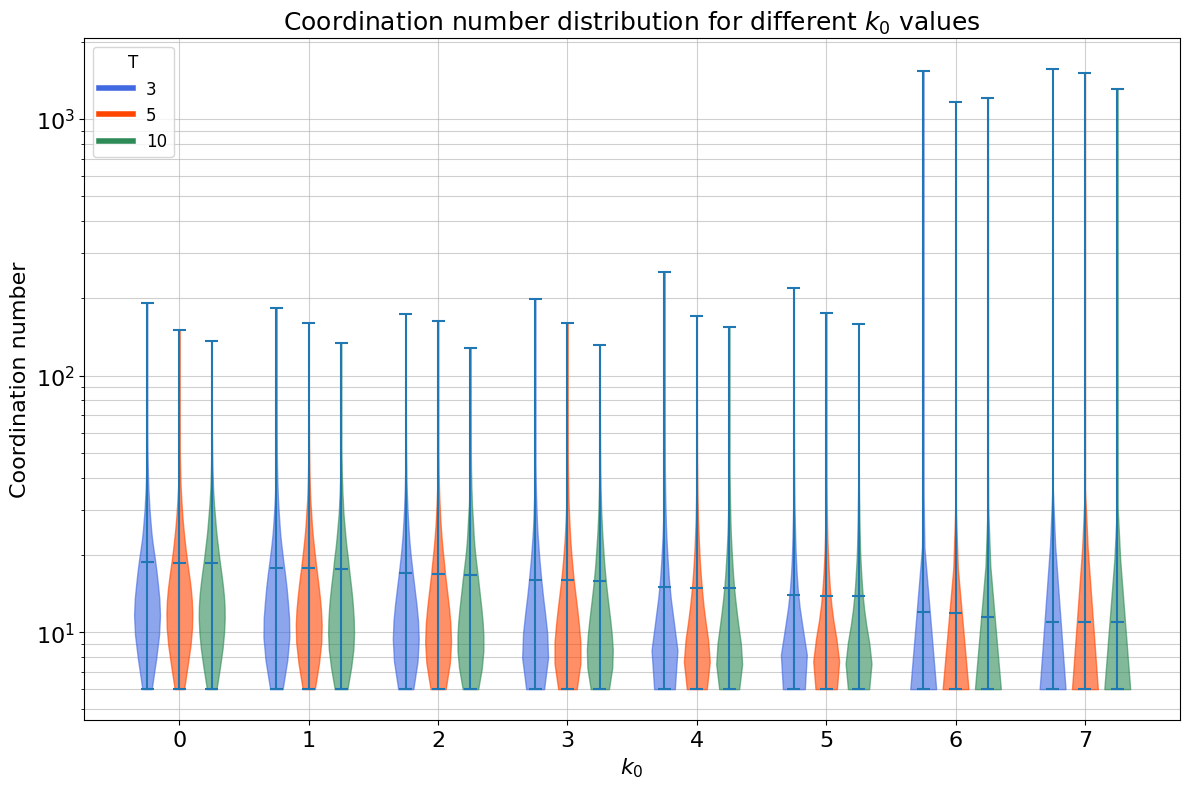

In [141]:
# Prepare the data for the violin plot
data_to_plot = []
positions = []
color_list = []

# Define an offset to separate the groups
offset = 0.25

# Collect data, positions, and colors for plotting
for i, k in enumerate(k0_values):
    data_to_plot.append(all_T3[k])
    data_to_plot.append(all_T5[k])
    data_to_plot.append(all_T10[k])
    positions.extend([i - offset, i, i + offset])
    color_list.extend([colors[0], colors[1], colors[2]])

# Make the violin plot
plt.figure(figsize=(12, 8))
violin_parts = plt.violinplot(data_to_plot, positions=positions, widths=0.2, showmeans=True, showextrema=True)
for pc, color in zip(violin_parts['bodies'], color_list):
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    # Set line color to black
    pc.set_linewidth(1)
    pc.set_alpha(0.6)

plt.yscale('log')
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('Coordination number', fontsize=16)
plt.title('Coordination number distribution for different $k_0$ values', fontsize=18)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.gca().set_axisbelow(True)
plt.yticks(fontsize=16)
plt.xticks(ticks=np.arange(len(k0_values)), labels=[f'{int(k)}' for k in k0_values], fontsize=16)
custom_lines = [plt.Line2D([0], [0], color=colors[0], lw=4, label='3'),
                plt.Line2D([0], [0], color=colors[1], lw=4, label='5'),
                plt.Line2D([0], [0], color=colors[2], lw=4, label='10')]
plt.legend(handles=custom_lines, title='T', fontsize=12, title_fontsize=12, fancybox=True, loc='upper left')
plt.tight_layout()
savepath = f'plots/curvature/cnum/violin_cnum_k0_N3000_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

### Ñ31 = 3000, 6000, 9000

In [136]:
# Get data from N31 = 3000, 6000, 9000
avg_cnum_3000 = {k: [] for k in k0_values}
avg_cnum_6000 = {k: [] for k in k0_values}
avg_cnum_9000 = {k: [] for k in k0_values}

avg_outliers_cnum_3000 = {k: [] for k in k0_values}
avg_outliers_cnum_6000 = {k: [] for k in k0_values}
avg_outliers_cnum_9000 = {k: [] for k in k0_values}

for N31 in N31_values:
    for k in k0_values:
        path = f'thermal_{N31}/T3/measurements/k0={k}'
        filepaths_cnum = glob.glob(f'{path}/*connections.npy')
    
        for filepath in filepaths_cnum:
            # The length of the values of the data dictionary is the cnum
            data = np.load(filepath, allow_pickle=True).item()
            cnum = [len(value) for value in data.values()]

            max_cnum = np.max(cnum)
            avg_cnum = np.mean(cnum)
            std_cnum = np.std(cnum)

            if N31 == 3000:
                avg_cnum_3000[k].append(avg_cnum)
                avg_outliers_cnum_3000[k].append(max_cnum)
            elif N31 == 6000:
                avg_cnum_6000[k].append(avg_cnum)
                avg_outliers_cnum_6000[k].append(max_cnum)
            elif N31 == 9000:
                avg_cnum_9000[k].append(avg_cnum)
                avg_outliers_cnum_9000[k].append(max_cnum)

# Make it a df
df_avg_cnum_3000 = pd.DataFrame(avg_cnum_3000).T
df_avg_cnum_6000 = pd.DataFrame(avg_cnum_6000).T
df_avg_cnum_9000 = pd.DataFrame(avg_cnum_9000).T

df_avg_outliers_cnum_3000 = pd.DataFrame(avg_outliers_cnum_3000).T
df_avg_outliers_cnum_6000 = pd.DataFrame(avg_outliers_cnum_6000).T
df_avg_outliers_cnum_9000 = pd.DataFrame(avg_outliers_cnum_9000).T

for df in [df_avg_cnum_3000, df_avg_cnum_6000, df_avg_cnum_9000, df_avg_outliers_cnum_3000, df_avg_outliers_cnum_6000, df_avg_outliers_cnum_9000]:
    df.index.name = 'k0'
    df.columns.name = 'chain'
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)

df_avg_cnum_3000

chain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,mean,std
k0,,,,,,,,,,,,,,,,,,
0.0,18.754167,18.836000,18.799743,18.746589,18.719892,18.636601,18.696085,18.881031,18.731790,18.763014,18.775415,18.860304,18.906917,18.908670,18.719031,18.765916,18.781323,0.075980
1.0,17.708389,17.803846,17.887604,17.779343,17.750704,17.922978,17.761716,17.842953,17.694158,17.924067,17.871658,17.810311,17.922343,17.872170,17.959740,17.798337,17.831895,0.078513
2.0,16.961783,16.813230,16.974717,16.696929,17.010855,16.984781,16.900977,16.859213,16.982323,16.987871,17.017070,16.835729,16.928177,17.038158,17.074448,16.989326,16.940974,0.094562
3.0,15.996587,15.927235,15.962484,16.020000,16.047302,16.010961,16.137107,16.000664,15.915369,15.953846,15.959530,15.909451,16.089356,16.110320,16.088197,15.997966,16.007898,0.068163
4.0,14.883548,14.974324,14.916452,14.977227,14.886940,14.978302,14.916094,14.844473,14.953006,14.947694,15.138546,15.052493,14.910408,15.003979,15.100551,14.846791,14.958177,0.081676
5.0,13.919450,13.770889,13.976562,13.950820,13.881793,14.110359,13.975309,13.894701,13.990579,13.970670,14.064690,13.938608,13.897555,14.104457,14.004899,13.867665,13.957438,0.086117
6.0,12.010512,11.924577,11.976267,12.425197,12.097322,11.052596,12.411525,12.207403,11.022078,12.088123,12.391132,12.045362,12.154050,12.428953,12.457333,11.611336,12.018985,0.432138
7.0,10.994490,10.984817,10.979839,10.983128,10.990117,10.985996,10.987936,10.988596,10.979562,10.981081,10.986121,10.985348,10.986264,10.981420,10.988966,10.988935,10.985788,0.003960


<>:12: SyntaxWarning: invalid escape sequence '\w'
<>:28: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\w'
<>:28: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_23726/591957792.py:12: SyntaxWarning: invalid escape sequence '\w'
  plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)
/tmp/ipykernel_23726/591957792.py:28: SyntaxWarning: invalid escape sequence '\w'
  plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)


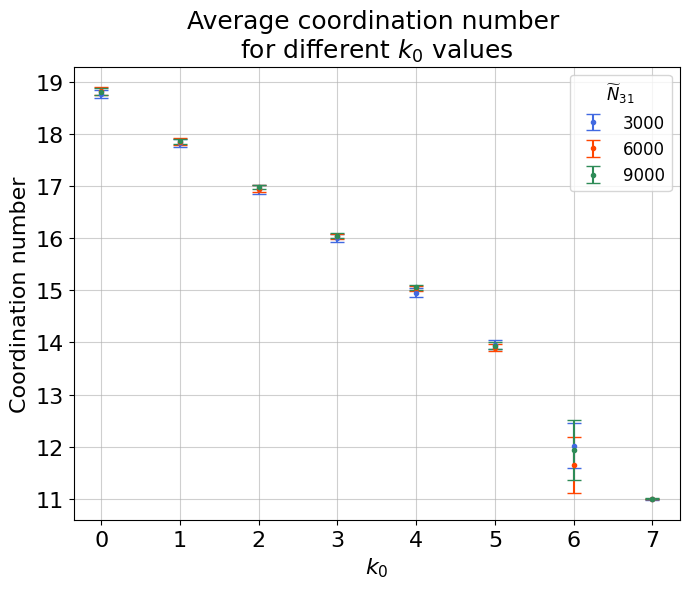

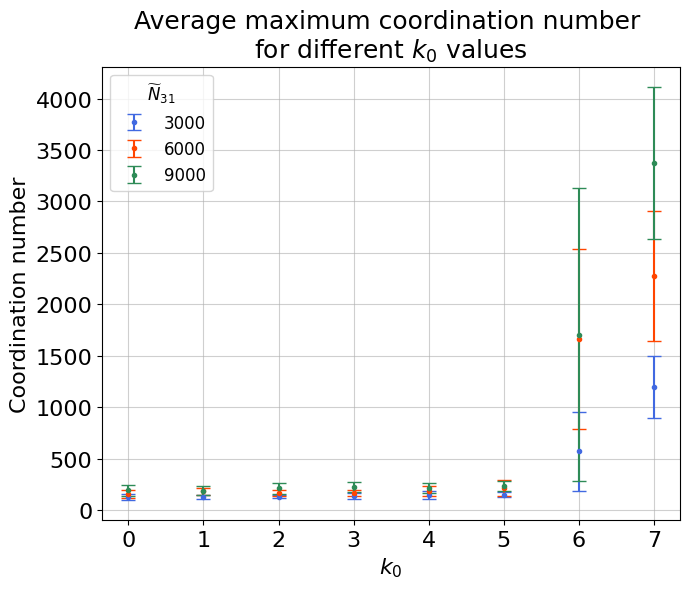

In [137]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
plt.errorbar(df_avg_cnum_3000.index, df_avg_cnum_3000['mean'], yerr=df_avg_cnum_3000['std'], fmt='.', capsize=5, label=3000, color=colors[0])
plt.errorbar(df_avg_cnum_6000.index, df_avg_cnum_6000['mean'], yerr=df_avg_cnum_6000['std'], fmt='.', capsize=5, label=6000, color=colors[1])
plt.errorbar(df_avg_cnum_9000.index, df_avg_cnum_9000['mean'], yerr=df_avg_cnum_9000['std'], fmt='.', capsize=5, label=9000, color=colors[2])
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('Coordination number', fontsize=16)
plt.title(f'Average coordination number \nfor different $k_0$ values', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/cnum/compare_cnum_k0_T3_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

# Plot the chains average maximum cnum with the standard deviation
plt.figure(figsize=(7, 6))
plt.errorbar(df_avg_outliers_cnum_3000.index, df_avg_outliers_cnum_3000['mean'], yerr=df_avg_outliers_cnum_3000['std'], fmt='.', capsize=5, label=3000, color=colors[0])
plt.errorbar(df_avg_outliers_cnum_6000.index, df_avg_outliers_cnum_6000['mean'], yerr=df_avg_outliers_cnum_6000['std'], fmt='.', capsize=5, label=6000, color=colors[1])
plt.errorbar(df_avg_outliers_cnum_9000.index, df_avg_outliers_cnum_9000['mean'], yerr=df_avg_outliers_cnum_9000['std'], fmt='.', capsize=5, label=9000, color=colors[2])
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('Coordination number', fontsize=16)
plt.title(f'Average maximum coordination number \nfor different $k_0$ values', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='$\widetilde{N}_{31}$', fancybox=True, fontsize=12, title_fontsize=12)
plt.tight_layout()
savepath = f'plots/curvature/cnum/max_compare_cnum_k0_T3_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')

#### STATISTICS

In [96]:
# Loop through each row (each group)
for i, df in enumerate([df_avg_cnum_3000, df_avg_cnum_6000, df_avg_cnum_9000]):
    print(f"\nShapiro-Wilk Test for N31={N31_values[i]}")
    for k0, data_row in df.iterrows():
        # Extract the observations for the current group
        observations = data_row[:-2]  # Exclude the last two columns (mean and std)
        
        # Perform the Shapiro-Wilk test
        stat, p_value = shapiro(observations)

        print(f"k0={k0}: Shapiro-Wilk Test Statistic={stat}, p-value={p_value}")

        if p_value < 0.05:
            print(f"Reject null hypothesis for k0={k0} (p-value={p_value})")
            # Perform Kruskal-Wallis test for all k0 to check if there is a significant difference between the medians
            result = kruskal(df_avg_cnum_3000['mean'], df_avg_cnum_6000['mean'], df_avg_cnum_9000['mean'])
            print(f"Kruskal-Wallis Test Statistic={stat}, p-value={p_value}")
        else:
            print(f"Fail to reject null hypothesis for k0={k0} (p-value={p_value})")
            # Perform ANOVA test for all k0 to check if there is a significant difference between the means
            result = f_oneway(df_avg_cnum_3000['mean'], df_avg_cnum_6000['mean'], df_avg_cnum_9000['mean'])
            print(f"ANOVA Test Statistic={stat}, p-value={p_value}")

# Save the result to a file
with open(f'plots/curvature/cnum/stats_results_T3_tswps={thermal_sweeps}.txt', 'w') as f:
    for i, df in enumerate([df_avg_cnum_3000, df_avg_cnum_6000, df_avg_cnum_9000]):
        f.write(f"{'='*40}\n")
        f.write(f"Shapiro-Wilk Test for N31={N31_values[i]}\n")
        f.write(f"{'='*40}\n")
        for k0, data_row in df.iterrows():
            observations = data_row[:-2]
            stat, p = shapiro(observations)
            f.write(f"k0={k0}: Shapiro-Wilk Test Statistic={stat}, p-value={p_value}\n")
            if p_value < 0.05:
                f.write(f"Reject null hypothesis for k0={k0} (p-value={p_value})\n")
                result = kruskal(df_avg_cnum_3000['mean'], df_avg_cnum_6000['mean'], df_avg_cnum_9000['mean'])
                f.write(f"Kruskal-Wallis Test Statistic={stat}, p-value={p_value}\n")
            else:
                f.write(f"Fail to reject null hypothesis for k0={k0} (p-value={p_value})\n")
                result = f_oneway(df_avg_cnum_3000['mean'], df_avg_cnum_6000['mean'], df_avg_cnum_9000['mean'])
                f.write(f"ANOVA Test Statistic={stat}, p-value={p_value}\n")


Shapiro-Wilk Test for N31=3000
k0=0.0: Shapiro-Wilk Test Statistic=0.9532610020127688, p-value=0.5430437046941123
Fail to reject null hypothesis for k0=0.0 (p-value=0.5430437046941123)
ANOVA Test Statistic=0.9532610020127688, p-value=0.5430437046941123
k0=1.0: Shapiro-Wilk Test Statistic=0.9591675992241533, p-value=0.6467083764380425
Fail to reject null hypothesis for k0=1.0 (p-value=0.6467083764380425)
ANOVA Test Statistic=0.9591675992241533, p-value=0.6467083764380425
k0=2.0: Shapiro-Wilk Test Statistic=0.9072924674620394, p-value=0.10524878011850064
Fail to reject null hypothesis for k0=2.0 (p-value=0.10524878011850064)
ANOVA Test Statistic=0.9072924674620394, p-value=0.10524878011850064
k0=3.0: Shapiro-Wilk Test Statistic=0.9485732124620964, p-value=0.46742728390418553
Fail to reject null hypothesis for k0=3.0 (p-value=0.46742728390418553)
ANOVA Test Statistic=0.9485732124620964, p-value=0.46742728390418553
k0=4.0: Shapiro-Wilk Test Statistic=0.9413865737495644, p-value=0.36634661

### Violin plots

In [132]:
T = 3

all_3000 = {k: [] for k in k0_values}
all_6000 = {k: [] for k in k0_values}
all_9000 = {k: [] for k in k0_values}

for i, N31 in enumerate(N31_values):
    for k in k0_values:
        path = f'thermal_{N31}/T{T}/measurements/k0={k}'
        filepaths_cnum = glob.glob(f'{path}/*connections.npy')

        # Combine all data from each chain
        cnum_tot = []
        for filepath in filepaths_cnum:
            data = np.load(filepath, allow_pickle=True).item()
            cnum = [len(value) for value in data.values()]
 
            if N31 == 3000:
                all_3000[k] += cnum
            elif N31 == 6000:
                all_6000[k] += cnum
            elif N31 == 9000:
                all_9000[k] += cnum


<>:37: SyntaxWarning: invalid escape sequence '\w'
<>:37: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_23726/1424249723.py:37: SyntaxWarning: invalid escape sequence '\w'
  plt.legend(handles=custom_lines, title='$\widetilde{N}_{31}$', fontsize=12, title_fontsize=12, fancybox=True, loc='upper left')


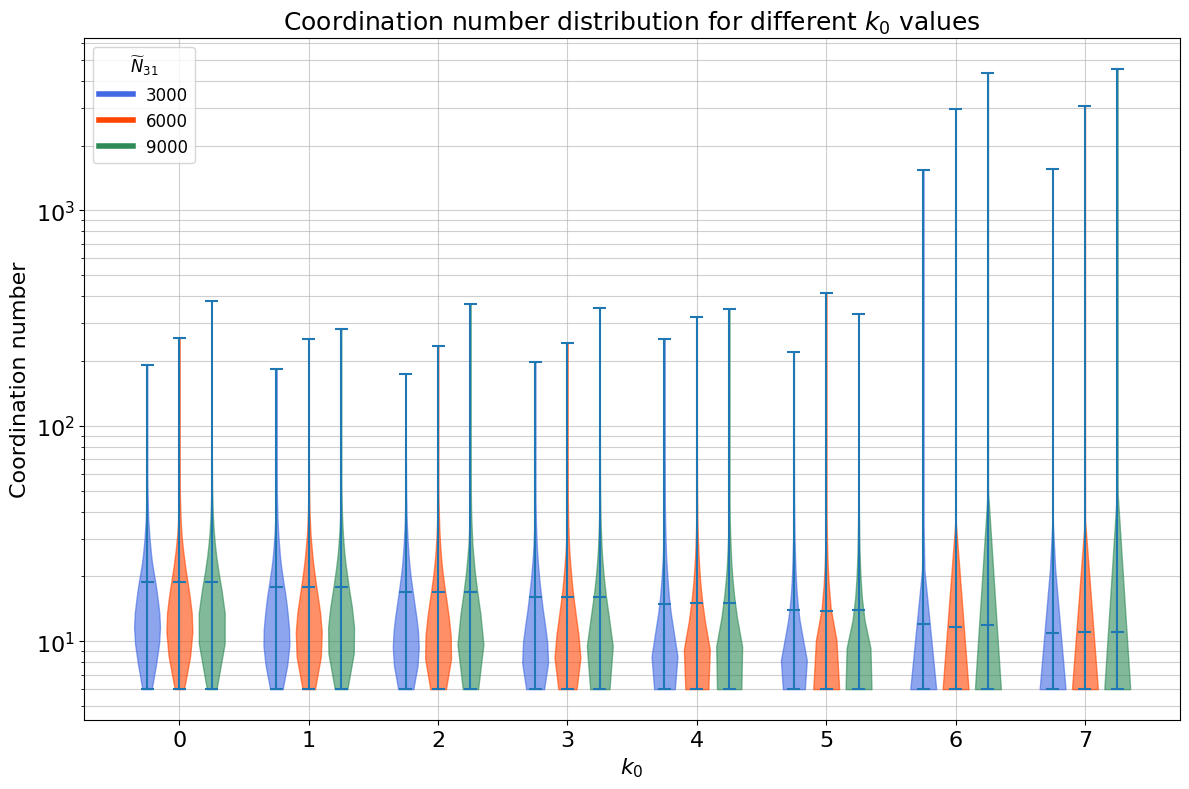

In [142]:
# Prepare the data for the violin plot
data_to_plot = []
positions = []
color_list = []

# Define an offset to separate the groups
offset = 0.25

# Collect data, positions, and colors for plotting
for i, k in enumerate(k0_values):
    data_to_plot.append(all_3000[k])
    data_to_plot.append(all_6000[k])
    data_to_plot.append(all_9000[k])
    positions.extend([i - offset, i, i + offset])
    color_list.extend([colors[0], colors[1], colors[2]])

# Make the violin plot
plt.figure(figsize=(12, 8))
violin_parts = plt.violinplot(data_to_plot, positions=positions, widths=0.2, showmeans=True, showextrema=True)
for pc, color in zip(violin_parts['bodies'], color_list):
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    pc.set_linewidth(1)
    pc.set_alpha(0.6)

plt.yscale('log')
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('Coordination number', fontsize=16)
plt.title('Coordination number distribution for different $k_0$ values', fontsize=18)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.gca().set_axisbelow(True)
plt.yticks(fontsize=16)
plt.xticks(ticks=np.arange(len(k0_values)), labels=[f'{int(k)}' for k in k0_values], fontsize=16)
custom_lines = [plt.Line2D([0], [0], color=colors[0], lw=4, label='3000'),
                plt.Line2D([0], [0], color=colors[1], lw=4, label='6000'),
                plt.Line2D([0], [0], color=colors[2], lw=4, label='9000')]
plt.legend(handles=custom_lines, title='$\widetilde{N}_{31}$', fontsize=12, title_fontsize=12, fancybox=True, loc='upper left')
plt.tight_layout()
savepath = f'plots/curvature/cnum/violin_cnum_k0_T3_tswps={thermal_sweeps}.png'
plt.savefig(savepath, dpi=400, bbox_inches='tight')